In [466]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## 1. import weather data set 

data reference : daily weather data set in Chicago from 2001.01.01. ~ 2018.12.31. https://www.visualcrossing.com/weather/weather-data-services



In [467]:
weather = pd.read_csv('/Users/kimgagyeong/chicago_weather_2001_2018.csv',low_memory=False)
weather = weather[['datetime', 'temp', 'feelslike', 'humidity', 'precip',  'windspeed', 
                   'cloudcover', 'visibility', 'solarenergy']]
weather.set_index('datetime',drop=True,inplace=True) # set index as datetime
weather.index = pd.to_datetime(weather.index)

weather

,temp,feelslike,humidity,precip,windspeed,cloudcover,visibility,solarenergy
datetime,,,,,,,,
2001-01-01,-7.6,-12.7,76.0,0.000,20.9,50.2,15.5,NaN
2001-01-02,-11.2,-17.6,81.3,0.000,21.5,2.2,15.0,NaN
2001-01-03,-6.2,-13.0,86.5,0.000,26.9,93.5,7.4,NaN
2001-01-04,-3.3,-8.8,86.4,0.000,34.4,98.6,11.4,NaN
2001-01-05,0.5,-4.8,71.2,6.069,33.5,43.0,15.5,NaN
...,...,...,...,...,...,...,...,...
2018-12-27,7.5,4.3,82.0,14.123,34.9,99.6,13.6,0.7
2018-12-28,3.1,-1.6,83.0,0.575,38.0,98.9,13.6,1.9
2018-12-29,-1.9,-5.8,86.3,0.628,25.7,100.0,11.8,0.8


In [468]:
weather.columns

Index(['temp', 'feelslike', 'humidity', 'precip', 'windspeed', 'cloudcover',
       'visibility', 'solarenergy'],
      dtype='object')

## 2. import crime data set
crime data set in Chicago from 2001.01.01. to present https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2/data

In [469]:
crime = pd.read_csv('/Users/kimgagyeong/Crimes_-_2001_to_Present.csv',low_memory=False, index_col=False)
crime

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7677062,12847575,JF420478,09/01/2022 05:00:00 AM,005XX W SURF ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,...,44.0,6.0,26,1172497.0,1919410.0,2022,11/12/2022 03:46:21 PM,41.934305,-87.641485,"(41.934304581, -87.641484982)"
7677063,12847801,JF420319,07/08/2022 12:00:00 AM,114XX S PRAIRIE AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,STREET,False,False,...,9.0,49.0,11,1179966.0,1828818.0,2022,11/12/2022 03:46:21 PM,41.685544,-87.616813,"(41.685543881, -87.616812541)"
7677064,12847324,JF420102,09/27/2022 11:00:00 AM,023XX E 70TH ST,0810,THEFT,OVER $500,RESIDENCE,False,False,...,5.0,43.0,06,1193181.0,1859005.0,2022,11/12/2022 03:46:21 PM,41.768068,-87.567453,"(41.768068052, -87.567452932)"
7677065,12847570,JF420427,09/03/2022 10:25:00 AM,052XX W CARMEN AVE,2021,NARCOTICS,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),True,False,...,45.0,11.0,18,1140553.0,1933418.0,2022,11/12/2022 03:46:21 PM,41.973391,-87.758535,"(41.973391184, -87.758534512)"


In [470]:
crime['Datetime'] = pd.to_datetime(crime['Date'],format="%m/%d/%Y %I:%M:%S %p")
crime['Date'] = crime['Datetime'].apply(lambda x:x.date())
crime

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Datetime
0,10224738,HY411648,2015-09-05,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)",2015-09-05 13:30:00
1,10224739,HY411615,2015-09-04,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)",2015-09-04 11:30:00
2,11646166,JC213529,2018-09-01,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2018-09-01 00:01:00
3,10224740,HY411595,2015-09-05,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)",2015-09-05 12:45:00
4,10224741,HY411610,2015-09-05,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)",2015-09-05 13:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7677062,12847575,JF420478,2022-09-01,005XX W SURF ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,...,6.0,26,1172497.0,1919410.0,2022,11/12/2022 03:46:21 PM,41.934305,-87.641485,"(41.934304581, -87.641484982)",2022-09-01 05:00:00
7677063,12847801,JF420319,2022-07-08,114XX S PRAIRIE AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,STREET,False,False,...,49.0,11,1179966.0,1828818.0,2022,11/12/2022 03:46:21 PM,41.685544,-87.616813,"(41.685543881, -87.616812541)",2022-07-08 00:00:00
7677064,12847324,JF420102,2022-09-27,023XX E 70TH ST,0810,THEFT,OVER $500,RESIDENCE,False,False,...,43.0,06,1193181.0,1859005.0,2022,11/12/2022 03:46:21 PM,41.768068,-87.567453,"(41.768068052, -87.567452932)",2022-09-27 11:00:00
7677065,12847570,JF420427,2022-09-03,052XX W CARMEN AVE,2021,NARCOTICS,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),True,False,...,11.0,18,1140553.0,1933418.0,2022,11/12/2022 03:46:21 PM,41.973391,-87.758535,"(41.973391184, -87.758534512)",2022-09-03 10:25:00


In [471]:
# set the datetime from 2001 - 2018
crime.index = pd.to_datetime(crime['Date'])
origin_crime = crime
crime = crime.loc[:'2018-12-31'].sort_index(ascending=True)
crime

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Datetime
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,1312193,G001854,2001-01-01,051XX W CHICAGO AV,5002,OTHER OFFENSE,OTHER VEHICLE OFFENSE,STREET,True,False,...,NaN,26,1141645.0,1904877.0,2001,08/17/2015 03:03:40 PM,41.895052,-87.755227,"(41.895051658, -87.755226623)",2001-01-01 21:00:00
2001-01-01,5751070,HN559680,2001-01-01,005XX W MADISON ST,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,...,28.0,06,1172495.0,1900252.0,2001,09/14/2007 01:49:03 AM,41.881734,-87.642060,"(41.881734075, -87.642059728)",2001-01-01 00:00:00
2001-01-01,1326897,G001938,2001-01-01,062XX S WOOD ST,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,...,NaN,18,1165459.0,1863328.0,2001,08/17/2015 03:03:40 PM,41.780563,-87.668944,"(41.780563388, -87.668944233)",2001-01-01 20:15:00
2001-01-01,1310871,G001484,2001-01-01,041XX W CULLOM AV,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,NaN,14,1148144.0,1928299.0,2001,08/17/2015 03:03:40 PM,41.959201,-87.730753,"(41.959201122, -87.730752719)",2001-01-01 01:30:00
2001-01-01,1310870,G001481,2001-01-01,103XX S COTTAGE GROVE AV,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,NaN,14,1182647.0,1836156.0,2001,08/17/2015 03:03:40 PM,41.705619,-87.606771,"(41.705618721, -87.606771496)",2001-01-01 02:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,11552265,JB574060,2018-12-31,079XX S RIDGELAND AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,46.0,14,1189358.0,1852747.0,2018,01/10/2019 03:16:50 PM,41.750988,-87.581666,"(41.750988117, -87.581666198)",2018-12-31 08:15:00
2018-12-31,11552266,JB573987,2018-12-31,045XX S WESTERN BLVD,1330,CRIMINAL TRESPASS,TO LAND,APPLIANCE STORE,True,False,...,61.0,26,1161289.0,1874276.0,2018,01/10/2019 03:16:50 PM,41.810694,-87.683929,"(41.810693516, -87.683929054)",2018-12-31 15:33:00
2018-12-31,11552268,JB574084,2018-12-31,091XX S COMMERCIAL AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,46.0,14,1197730.0,1845034.0,2018,01/10/2019 03:16:50 PM,41.729618,-87.551245,"(41.729618252, -87.551244573)",2018-12-31 16:30:00


## 3. crime data visualization

In [472]:
crime['weekday'] = crime['Datetime'].dt.day_name()
crime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Datetime,weekday
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,1312193,G001854,2001-01-01,051XX W CHICAGO AV,5002,OTHER OFFENSE,OTHER VEHICLE OFFENSE,STREET,True,False,...,26,1141645.0,1904877.0,2001,08/17/2015 03:03:40 PM,41.895052,-87.755227,"(41.895051658, -87.755226623)",2001-01-01 21:00:00,Monday
2001-01-01,5751070,HN559680,2001-01-01,005XX W MADISON ST,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,...,06,1172495.0,1900252.0,2001,09/14/2007 01:49:03 AM,41.881734,-87.642060,"(41.881734075, -87.642059728)",2001-01-01 00:00:00,Monday
2001-01-01,1326897,G001938,2001-01-01,062XX S WOOD ST,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,...,18,1165459.0,1863328.0,2001,08/17/2015 03:03:40 PM,41.780563,-87.668944,"(41.780563388, -87.668944233)",2001-01-01 20:15:00,Monday
2001-01-01,1310871,G001484,2001-01-01,041XX W CULLOM AV,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,14,1148144.0,1928299.0,2001,08/17/2015 03:03:40 PM,41.959201,-87.730753,"(41.959201122, -87.730752719)",2001-01-01 01:30:00,Monday
2001-01-01,1310870,G001481,2001-01-01,103XX S COTTAGE GROVE AV,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,14,1182647.0,1836156.0,2001,08/17/2015 03:03:40 PM,41.705619,-87.606771,"(41.705618721, -87.606771496)",2001-01-01 02:00:00,Monday


Text(6.800000000000011, 0.5, 'Count')

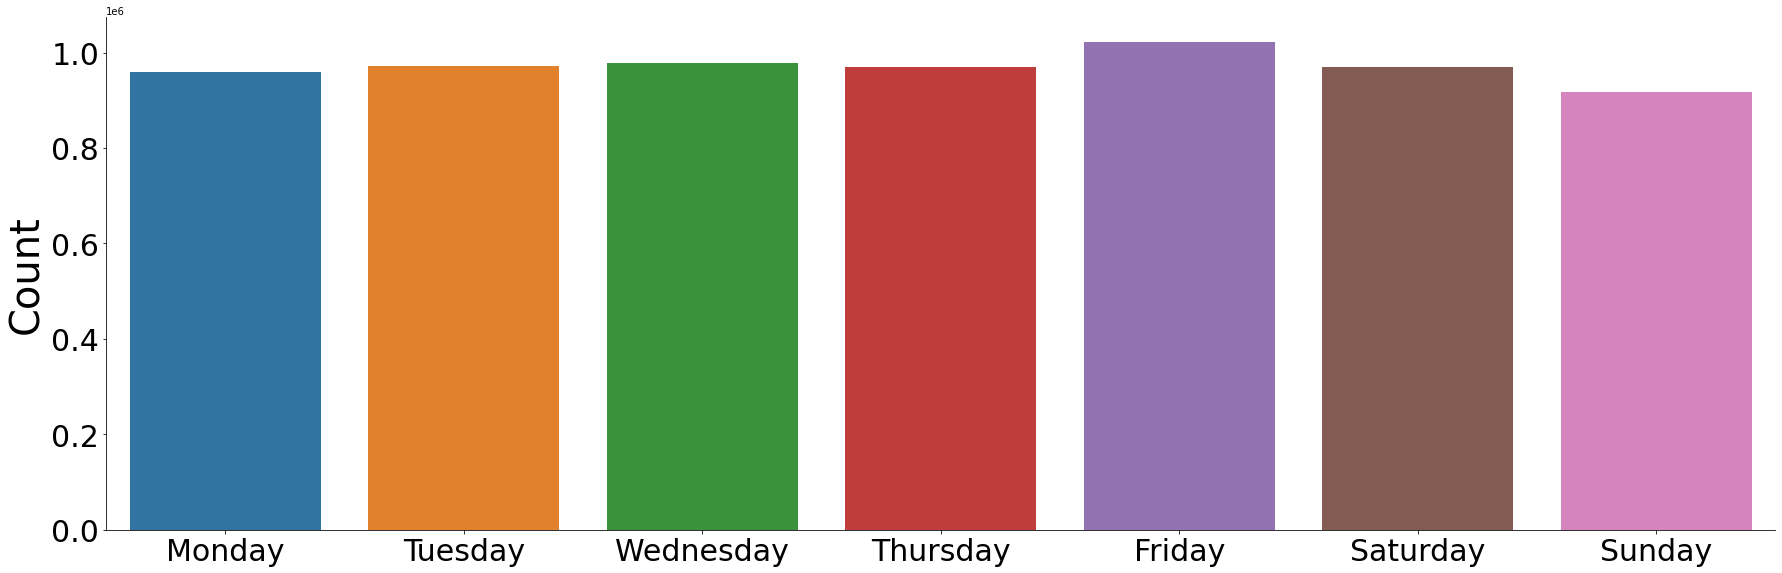

In [473]:
import seaborn as sns

# Crimes by day of the week
sns.catplot(x='weekday',
           kind='count',
            height=8, 
            aspect=3,
           data=crime)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('')
plt.ylabel('Count', fontsize=40)

Text(-15.449999999999989, 0.5, 'Count')

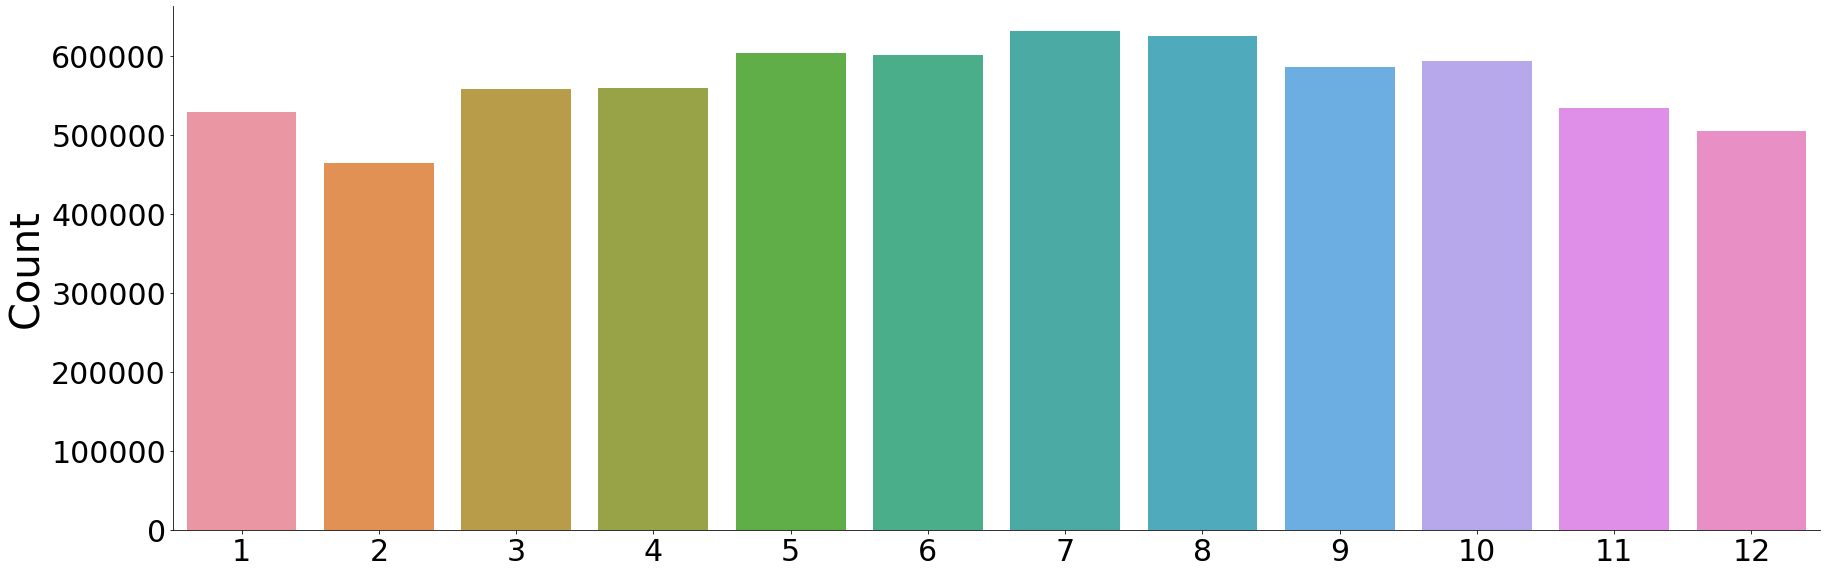

In [474]:
# 평균적으로 여름에 가장 범죄율이 높다
# Crimes by month of year
crime['month']=crime['Datetime'].dt.month
sns.catplot(x='month',
           kind='count',
            height=8, 
            aspect=3,
           data=crime)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('')
plt.ylabel('Count', fontsize=40)

Text(-15.449999999999996, 0.5, 'Count')

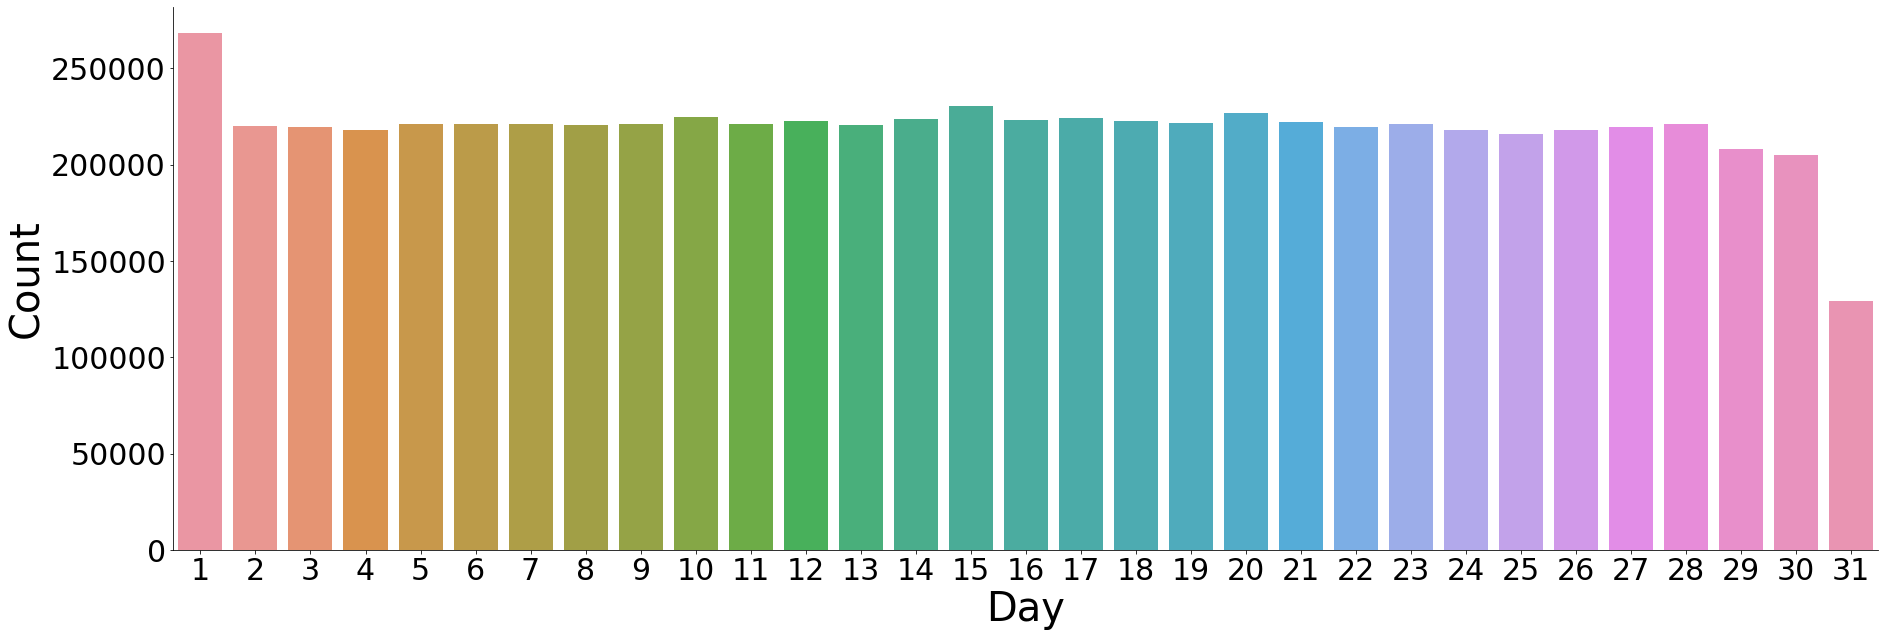

In [475]:
# Crimes by day
crime['day']=crime['Datetime'].dt.day
sns.catplot(x='day',
           kind='count',
            height=8.27, 
            aspect=3,
           data=crime)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Day', fontsize=40)
plt.ylabel('Count', fontsize=40)


Text(-15.449999999999996, 0.5, 'Count')

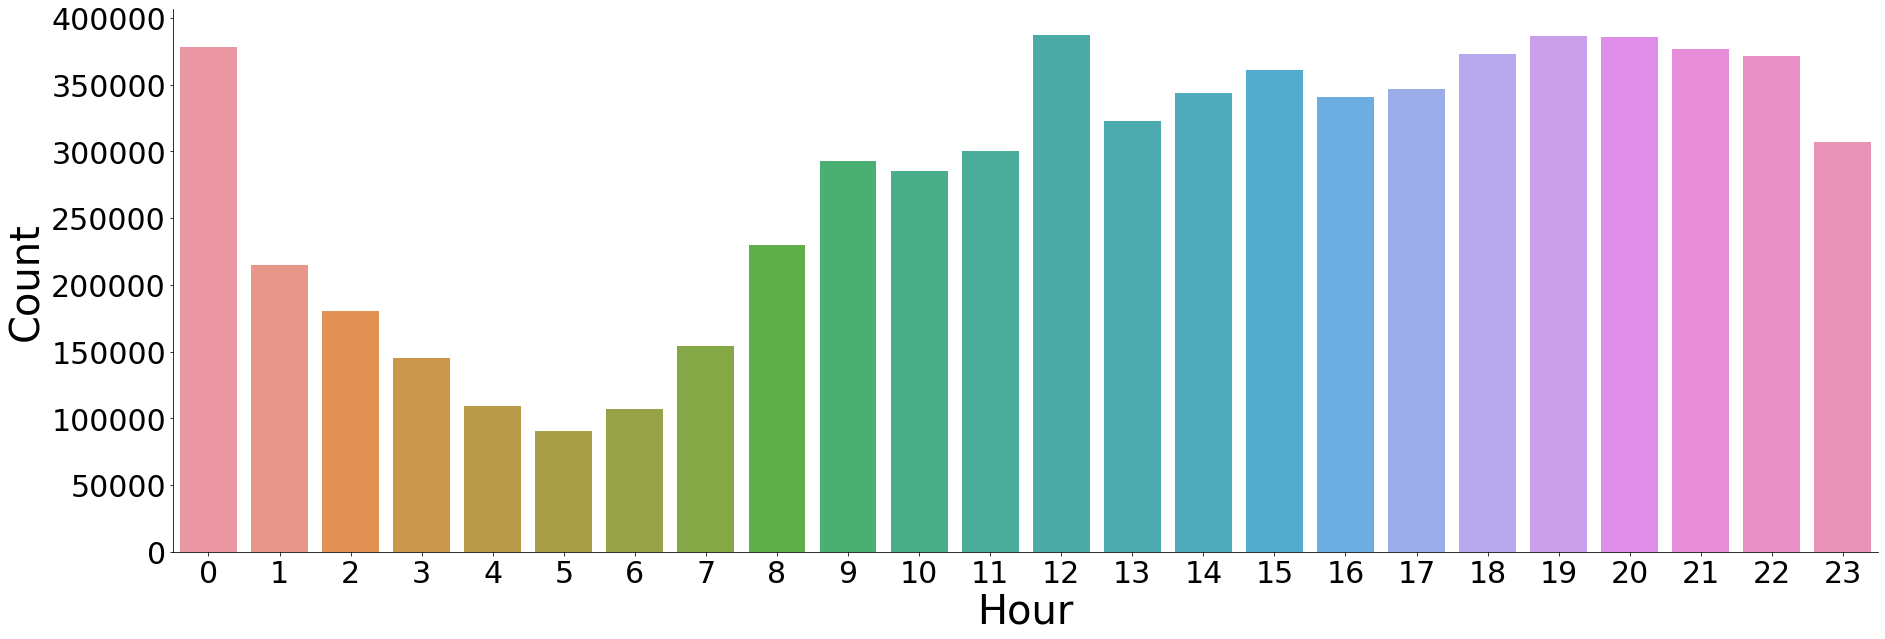

In [476]:
# Crimes by hour
crime['hour']=crime['Datetime'].dt.hour
sns.catplot(x='hour',
           kind='count',
            height=8.27, 
            aspect=3,
           data=crime)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Hour', fontsize=40)
plt.ylabel('Count', fontsize=40)
#결과를 보면 범죄는 새벽에 가장 낮은 빈도를, 오후에 가장 높은 빈도를 
#보인다.

## 4. merge crime data and weather data

In [477]:
crime.index.name = None
crime.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Datetime', 'weekday', 'month', 'day', 'hour'],
      dtype='object')

In [478]:
crime['Primary Type'].value_counts()

THEFT                                1427536
BATTERY                              1238467
CRIMINAL DAMAGE                       775013
NARCOTICS                             713523
OTHER OFFENSE                         421140
ASSAULT                               421092
BURGLARY                              389598
MOTOR VEHICLE THEFT                   315594
DECEPTIVE PRACTICE                    269575
ROBBERY                               256942
CRIMINAL TRESPASS                     194241
WEAPONS VIOLATION                      71387
PROSTITUTION                           68415
PUBLIC PEACE VIOLATION                 47982
OFFENSE INVOLVING CHILDREN             46832
CRIM SEXUAL ASSAULT                    26708
SEX OFFENSE                            25662
INTERFERENCE WITH PUBLIC OFFICER       15299
GAMBLING                               14427
LIQUOR LAW VIOLATION                   14084
ARSON                                  11207
HOMICIDE                                9556
KIDNAPPING

In [479]:
THEFT = crime[crime['Primary Type'] == 'THEFT'].groupby('Date')['Primary Type'].agg(len)
BATTERY = crime[crime['Primary Type'] == 'BATTERY'].groupby('Date')['Primary Type'].agg(len)
CRIMINAL_DAMAGE   = crime[crime['Primary Type'] == 'CRIMINAL DAMAGE'].groupby('Date')['Primary Type'].agg(len)
ASSAULT = crime[crime['Primary Type'] == 'ASSAULT'].groupby('Date')['Primary Type'].agg(len)
BURGLARY = crime[crime['Primary Type'] == 'BURGLARY'].groupby('Date')['Primary Type'].agg(len)
NARCOTICS = crime[crime['Primary Type'] == 'NARCOTICS'].groupby('Date')['Primary Type'].agg(len)
ROBBERY = crime[crime['Primary Type'] == 'ROBBERY'].groupby('Date')['Primary Type'].agg(len)
MOTOR_VEHICLE_THEFT = crime[crime['Primary Type'] == 'MOTOR VEHICLE THEFT'].groupby('Date')['Primary Type'].agg(len)
CRIMINAL_TRESPASS = crime[crime['Primary Type'] == 'CRIMINAL TRESPASS'].groupby('Date')['Primary Type'].agg(len)
WEAPONS_VIOLATION = crime[crime['Primary Type'] == 'WEAPONS VIOLATION'].groupby('Date')['Primary Type'].agg(len)
OFFENSE_INVOLVING_CHILDREN = crime[crime['Primary Type'] == 'OFFENSE INVOLVING CHILDREN'].groupby('Date')['Primary Type'].agg(len)
CRIM_SEXUAL_ASSAULT = crime[crime['Primary Type'] == 'CRIM SEXUAL ASSAULT'].groupby('Date')['Primary Type'].agg(len)
INTERFERENCE_WITH_PUBLIC_OFFICER = crime[crime['Primary Type'] == 'INTERFERENCE WITH PUBLIC OFFICER'].groupby('Date')['Primary Type'].agg(len)
SEX_OFFENSE = crime[crime['Primary Type'] == 'SEX OFFENSE'].groupby('Date')['Primary Type'].agg(len)
PROSTITUTION = crime[crime['Primary Type'] == 'PROSTITUTION'].groupby('Date')['Primary Type'].agg(len)
ARSON = crime[crime['Primary Type'] == 'ARSON'].groupby('Date')['Primary Type'].agg(len)
LIQUOR_LAW_VIOLATION = crime[crime['Primary Type'] == 'LIQUOR LAW VIOLATION'].groupby('Date')['Primary Type'].agg(len)
KIDNAPPING = crime[crime['Primary Type'] == 'KIDNAPPING'].groupby('Date')['Primary Type'].agg(len)
ALL_CRIM = crime.groupby('Date')['Primary Type'].agg(len)



THEFT.index = pd.to_datetime(THEFT.index)
BATTERY.index = pd.to_datetime(BATTERY.index)
CRIMINAL_DAMAGE.index = pd.to_datetime(CRIMINAL_DAMAGE.index)
ASSAULT.index = pd.to_datetime(ASSAULT.index)
BURGLARY.index = pd.to_datetime(BURGLARY.index)
NARCOTICS.index = pd.to_datetime(NARCOTICS.index)
ROBBERY.index = pd.to_datetime(ROBBERY.index)
MOTOR_VEHICLE_THEFT.index = pd.to_datetime(MOTOR_VEHICLE_THEFT.index)
CRIMINAL_TRESPASS.index = pd.to_datetime(CRIMINAL_TRESPASS.index)
WEAPONS_VIOLATION.index = pd.to_datetime(WEAPONS_VIOLATION.index)
OFFENSE_INVOLVING_CHILDREN.index = pd.to_datetime(OFFENSE_INVOLVING_CHILDREN.index)
CRIM_SEXUAL_ASSAULT.index = pd.to_datetime(CRIM_SEXUAL_ASSAULT.index)
INTERFERENCE_WITH_PUBLIC_OFFICER.index = pd.to_datetime(INTERFERENCE_WITH_PUBLIC_OFFICER.index)
SEX_OFFENSE.index = pd.to_datetime(SEX_OFFENSE.index)
PROSTITUTION.index = pd.to_datetime(PROSTITUTION.index)
ARSON.index = pd.to_datetime(ARSON.index)
LIQUOR_LAW_VIOLATION.index = pd.to_datetime(LIQUOR_LAW_VIOLATION.index)
KIDNAPPING.index = pd.to_datetime(KIDNAPPING.index)
ALL_CRIM.index = pd.to_datetime(ALL_CRIM.index)



In [480]:
THEFT

Date
2001-01-01    412
2001-01-02    221
2001-01-03    226
2001-01-04    243
2001-01-05    265
             ... 
2018-12-27    171
2018-12-28    187
2018-12-29    145
2018-12-30    142
2018-12-31    160
Name: Primary Type, Length: 6574, dtype: int64

In [481]:
#merge함수를 이용하여 공통 컬럼을 기준으로 데이터를 합친다
#기준이 되는 컬럼(Datetime)이 key이다
df = pd.merge(weather, THEFT, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'THEFT'})

df = pd.merge(df, BATTERY, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'BATTERY'})

df = pd.merge(df, CRIMINAL_DAMAGE, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'CRIMINAL_DAMAGE'})

df = pd.merge(df, ASSAULT, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'ASSAULT'})

df = pd.merge(df, BURGLARY, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'BURGLARY'})

df = pd.merge(df, NARCOTICS, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'NARCOTICS'})

df = pd.merge(df, ROBBERY, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'ROBBERY'})

df = pd.merge(df, MOTOR_VEHICLE_THEFT, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'MOTOR_VEHICLE_THEFT'})

df = pd.merge(df, CRIMINAL_TRESPASS, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'CRIMINAL_TRESPASS'})

df = pd.merge(df, WEAPONS_VIOLATION, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'WEAPONS_VIOLATION'})

df = pd.merge(df, OFFENSE_INVOLVING_CHILDREN, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'OFFENSE_INVOLVING_CHILDREN'})

df = pd.merge(df, CRIM_SEXUAL_ASSAULT, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'CRIM_SEXUAL_ASSAULT'})

df = pd.merge(df, INTERFERENCE_WITH_PUBLIC_OFFICER, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'INTERFERENCE_WITH_PUBLIC_OFFICER'})

df = pd.merge(df, SEX_OFFENSE, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'SEX_OFFENSE'})

df = pd.merge(df, PROSTITUTION, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'PROSTITUTION'})

df = pd.merge(df, ARSON, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'ARSON'})

df = pd.merge(df, LIQUOR_LAW_VIOLATION, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'LIQUOR_LAW_VIOLATION'})

df = pd.merge(df, KIDNAPPING, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'KIDNAPPING'})


df

,temp,feelslike,humidity,precip,windspeed,cloudcover,visibility,solarenergy,THEFT,BATTERY,...,CRIMINAL_TRESPASS,WEAPONS_VIOLATION,OFFENSE_INVOLVING_CHILDREN,CRIM_SEXUAL_ASSAULT,INTERFERENCE_WITH_PUBLIC_OFFICER,SEX_OFFENSE,PROSTITUTION,ARSON,LIQUOR_LAW_VIOLATION,KIDNAPPING
datetime,,,,,,,,,,,,,,,,,,,,,
2001-01-01,-7.6,-12.7,76.0,0.000,20.9,50.2,15.5,NaN,412,296,...,29,32.0,100.0,38.0,1.0,65.0,5.0,NaN,3.0,2.0
2001-01-02,-11.2,-17.6,81.3,0.000,21.5,2.2,15.0,NaN,221,143,...,35,9.0,4.0,2.0,1.0,4.0,11.0,NaN,2.0,1.0
2001-01-03,-6.2,-13.0,86.5,0.000,26.9,93.5,7.4,NaN,226,165,...,35,7.0,3.0,7.0,NaN,5.0,16.0,1.0,2.0,3.0
2001-01-04,-3.3,-8.8,86.4,0.000,34.4,98.6,11.4,NaN,243,173,...,29,9.0,5.0,2.0,3.0,1.0,19.0,1.0,4.0,2.0
2001-01-05,0.5,-4.8,71.2,6.069,33.5,43.0,15.5,NaN,265,178,...,29,6.0,9.0,6.0,2.0,2.0,16.0,3.0,8.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,7.5,4.3,82.0,14.123,34.9,99.6,13.6,0.7,171,92,...,14,19.0,7.0,1.0,3.0,2.0,5.0,NaN,NaN,1.0
2018-12-28,3.1,-1.6,83.0,0.575,38.0,98.9,13.6,1.9,187,119,...,16,20.0,6.0,3.0,2.0,2.0,3.0,NaN,1.0,3.0
2018-12-29,-1.9,-5.8,86.3,0.628,25.7,100.0,11.8,0.8,145,142,...,19,21.0,4.0,3.0,4.0,1.0,NaN,2.0,1.0,1.0


In [482]:
df.isnull().sum()

temp                                   0
feelslike                              0
humidity                               0
precip                                 0
windspeed                              0
cloudcover                             0
visibility                             0
solarenergy                         3287
THEFT                                  0
BATTERY                                0
CRIMINAL_DAMAGE                        0
ASSAULT                                0
BURGLARY                               0
NARCOTICS                              0
ROBBERY                                0
MOTOR_VEHICLE_THEFT                    0
CRIMINAL_TRESPASS                      0
WEAPONS_VIOLATION                      2
OFFENSE_INVOLVING_CHILDREN            17
CRIM_SEXUAL_ASSAULT                  214
INTERFERENCE_WITH_PUBLIC_OFFICER    1035
SEX_OFFENSE                          354
PROSTITUTION                         702
ARSON                               1515
LIQUOR_LAW_VIOLA

In [483]:

origin_df = df #시계열 예측을 위해 이상치 결측치 처리 전에 저장!
origin_df

,temp,feelslike,humidity,precip,windspeed,cloudcover,visibility,solarenergy,THEFT,BATTERY,...,CRIMINAL_TRESPASS,WEAPONS_VIOLATION,OFFENSE_INVOLVING_CHILDREN,CRIM_SEXUAL_ASSAULT,INTERFERENCE_WITH_PUBLIC_OFFICER,SEX_OFFENSE,PROSTITUTION,ARSON,LIQUOR_LAW_VIOLATION,KIDNAPPING
datetime,,,,,,,,,,,,,,,,,,,,,
2001-01-01,-7.6,-12.7,76.0,0.000,20.9,50.2,15.5,NaN,412,296,...,29,32.0,100.0,38.0,1.0,65.0,5.0,NaN,3.0,2.0
2001-01-02,-11.2,-17.6,81.3,0.000,21.5,2.2,15.0,NaN,221,143,...,35,9.0,4.0,2.0,1.0,4.0,11.0,NaN,2.0,1.0
2001-01-03,-6.2,-13.0,86.5,0.000,26.9,93.5,7.4,NaN,226,165,...,35,7.0,3.0,7.0,NaN,5.0,16.0,1.0,2.0,3.0
2001-01-04,-3.3,-8.8,86.4,0.000,34.4,98.6,11.4,NaN,243,173,...,29,9.0,5.0,2.0,3.0,1.0,19.0,1.0,4.0,2.0
2001-01-05,0.5,-4.8,71.2,6.069,33.5,43.0,15.5,NaN,265,178,...,29,6.0,9.0,6.0,2.0,2.0,16.0,3.0,8.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,7.5,4.3,82.0,14.123,34.9,99.6,13.6,0.7,171,92,...,14,19.0,7.0,1.0,3.0,2.0,5.0,NaN,NaN,1.0
2018-12-28,3.1,-1.6,83.0,0.575,38.0,98.9,13.6,1.9,187,119,...,16,20.0,6.0,3.0,2.0,2.0,3.0,NaN,1.0,3.0
2018-12-29,-1.9,-5.8,86.3,0.628,25.7,100.0,11.8,0.8,145,142,...,19,21.0,4.0,3.0,4.0,1.0,NaN,2.0,1.0,1.0


In [484]:
#데이터 타입 확인
df.dtypes

temp                                float64
feelslike                           float64
humidity                            float64
precip                              float64
windspeed                           float64
cloudcover                          float64
visibility                          float64
solarenergy                         float64
THEFT                                 int64
BATTERY                               int64
CRIMINAL_DAMAGE                       int64
ASSAULT                               int64
BURGLARY                              int64
NARCOTICS                             int64
ROBBERY                               int64
MOTOR_VEHICLE_THEFT                   int64
CRIMINAL_TRESPASS                     int64
WEAPONS_VIOLATION                   float64
OFFENSE_INVOLVING_CHILDREN          float64
CRIM_SEXUAL_ASSAULT                 float64
INTERFERENCE_WITH_PUBLIC_OFFICER    float64
SEX_OFFENSE                         float64
PROSTITUTION                    

In [485]:
df

,temp,feelslike,humidity,precip,windspeed,cloudcover,visibility,solarenergy,THEFT,BATTERY,...,CRIMINAL_TRESPASS,WEAPONS_VIOLATION,OFFENSE_INVOLVING_CHILDREN,CRIM_SEXUAL_ASSAULT,INTERFERENCE_WITH_PUBLIC_OFFICER,SEX_OFFENSE,PROSTITUTION,ARSON,LIQUOR_LAW_VIOLATION,KIDNAPPING
datetime,,,,,,,,,,,,,,,,,,,,,
2001-01-01,-7.6,-12.7,76.0,0.000,20.9,50.2,15.5,NaN,412,296,...,29,32.0,100.0,38.0,1.0,65.0,5.0,NaN,3.0,2.0
2001-01-02,-11.2,-17.6,81.3,0.000,21.5,2.2,15.0,NaN,221,143,...,35,9.0,4.0,2.0,1.0,4.0,11.0,NaN,2.0,1.0
2001-01-03,-6.2,-13.0,86.5,0.000,26.9,93.5,7.4,NaN,226,165,...,35,7.0,3.0,7.0,NaN,5.0,16.0,1.0,2.0,3.0
2001-01-04,-3.3,-8.8,86.4,0.000,34.4,98.6,11.4,NaN,243,173,...,29,9.0,5.0,2.0,3.0,1.0,19.0,1.0,4.0,2.0
2001-01-05,0.5,-4.8,71.2,6.069,33.5,43.0,15.5,NaN,265,178,...,29,6.0,9.0,6.0,2.0,2.0,16.0,3.0,8.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,7.5,4.3,82.0,14.123,34.9,99.6,13.6,0.7,171,92,...,14,19.0,7.0,1.0,3.0,2.0,5.0,NaN,NaN,1.0
2018-12-28,3.1,-1.6,83.0,0.575,38.0,98.9,13.6,1.9,187,119,...,16,20.0,6.0,3.0,2.0,2.0,3.0,NaN,1.0,3.0
2018-12-29,-1.9,-5.8,86.3,0.628,25.7,100.0,11.8,0.8,145,142,...,19,21.0,4.0,3.0,4.0,1.0,NaN,2.0,1.0,1.0


## 5. 결측치, 이상치 처리

<AxesSubplot:ylabel='datetime'>

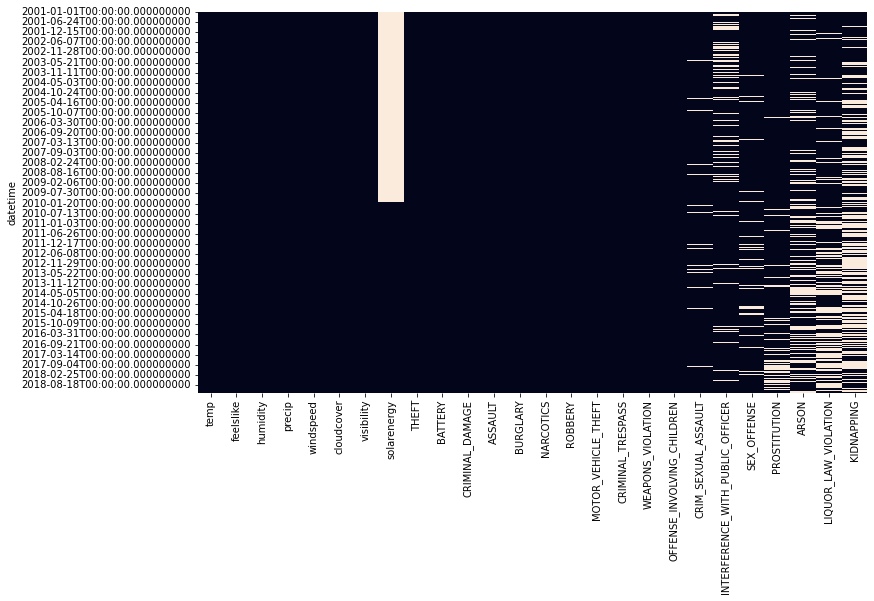

In [486]:


#결측값 시각화
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull(),cbar=False)
#결과를 보면 태양에너지, 범죄 종류 8개의 열에 결측값 있음(그 시간대에 일어나지 않았다는 의미이으로 0을 대입)

In [487]:
#결측치 처리(비어있는 데이터 값을 모두 0으로)
df= df.fillna(0)
df

,temp,feelslike,humidity,precip,windspeed,cloudcover,visibility,solarenergy,THEFT,BATTERY,...,CRIMINAL_TRESPASS,WEAPONS_VIOLATION,OFFENSE_INVOLVING_CHILDREN,CRIM_SEXUAL_ASSAULT,INTERFERENCE_WITH_PUBLIC_OFFICER,SEX_OFFENSE,PROSTITUTION,ARSON,LIQUOR_LAW_VIOLATION,KIDNAPPING
datetime,,,,,,,,,,,,,,,,,,,,,
2001-01-01,-7.6,-12.7,76.0,0.000,20.9,50.2,15.5,0.0,412,296,...,29,32.0,100.0,38.0,1.0,65.0,5.0,0.0,3.0,2.0
2001-01-02,-11.2,-17.6,81.3,0.000,21.5,2.2,15.0,0.0,221,143,...,35,9.0,4.0,2.0,1.0,4.0,11.0,0.0,2.0,1.0
2001-01-03,-6.2,-13.0,86.5,0.000,26.9,93.5,7.4,0.0,226,165,...,35,7.0,3.0,7.0,0.0,5.0,16.0,1.0,2.0,3.0
2001-01-04,-3.3,-8.8,86.4,0.000,34.4,98.6,11.4,0.0,243,173,...,29,9.0,5.0,2.0,3.0,1.0,19.0,1.0,4.0,2.0
2001-01-05,0.5,-4.8,71.2,6.069,33.5,43.0,15.5,0.0,265,178,...,29,6.0,9.0,6.0,2.0,2.0,16.0,3.0,8.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,7.5,4.3,82.0,14.123,34.9,99.6,13.6,0.7,171,92,...,14,19.0,7.0,1.0,3.0,2.0,5.0,0.0,0.0,1.0
2018-12-28,3.1,-1.6,83.0,0.575,38.0,98.9,13.6,1.9,187,119,...,16,20.0,6.0,3.0,2.0,2.0,3.0,0.0,1.0,3.0
2018-12-29,-1.9,-5.8,86.3,0.628,25.7,100.0,11.8,0.8,145,142,...,19,21.0,4.0,3.0,4.0,1.0,0.0,2.0,1.0,1.0


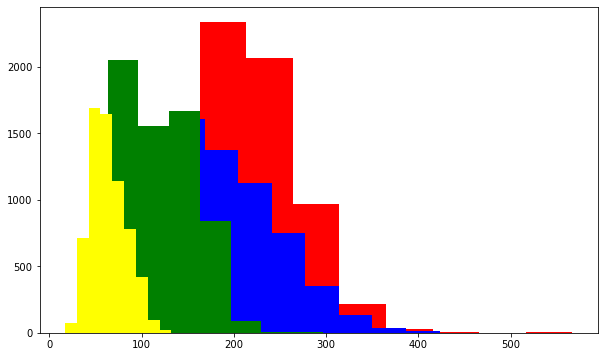

In [488]:
#데이터 시각화 > 
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
plt.hist(df.THEFT, color='red')
plt.hist(df.BATTERY, color='blue')
plt.hist(df.CRIMINAL_DAMAGE, color='green')
plt.hist(df.ASSAULT, color='yellow')
plt.show()

In [489]:
df.columns

Index(['temp', 'feelslike', 'humidity', 'precip', 'windspeed', 'cloudcover',
       'visibility', 'solarenergy', 'THEFT', 'BATTERY', 'CRIMINAL_DAMAGE',
       'ASSAULT', 'BURGLARY', 'NARCOTICS', 'ROBBERY', 'MOTOR_VEHICLE_THEFT',
       'CRIMINAL_TRESPASS', 'WEAPONS_VIOLATION', 'OFFENSE_INVOLVING_CHILDREN',
       'CRIM_SEXUAL_ASSAULT', 'INTERFERENCE_WITH_PUBLIC_OFFICER',
       'SEX_OFFENSE', 'PROSTITUTION', 'ARSON', 'LIQUOR_LAW_VIOLATION',
       'KIDNAPPING'],
      dtype='object')

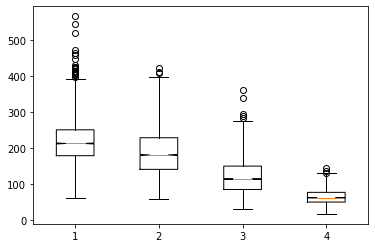

In [490]:
#이상값 시각화 >
plt.boxplot([df.THEFT, df.BATTERY, df.CRIMINAL_DAMAGE, df.ASSAULT], notch=True, whis=2.0)
plt.show()

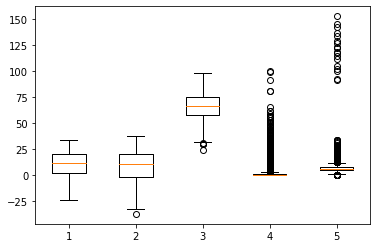

In [491]:
plt.boxplot([df.temp, df.feelslike, df.humidity, df.precip, df.OFFENSE_INVOLVING_CHILDREN])
plt.show()

In [492]:
# 이상값 처리 >

# import pandas as pd
# %matplotlib inline

# def delOutlier :
#     q1=df['OFFENSE_INVOLVING_CHILDREN'].quantile(0.1)
#     q3=df['OFFENSE_INVOLVING_CHILDREN'].quantile(0.9)
#     iqr=q3-q1

#     condition=df['OFFENSE_INVOLVING_CHILDREN']>q3+1.5*iqr
#     a=df[condition].index
#     df.drop(a,inplace=True)

# df.plot(kind='scatter',x='temp',y='OFFENSE_INVOLVING_CHILDREN')

In [493]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight
  
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
  
    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx

col = [ 'THEFT', 'BATTERY', 'CRIMINAL_DAMAGE',
       'ASSAULT', 'BURGLARY', 'NARCOTICS', 'ROBBERY', 'MOTOR_VEHICLE_THEFT',
       'CRIMINAL_TRESPASS', 'WEAPONS_VIOLATION', 'OFFENSE_INVOLVING_CHILDREN',
       'CRIM_SEXUAL_ASSAULT', 'INTERFERENCE_WITH_PUBLIC_OFFICER',
       'SEX_OFFENSE', 'PROSTITUTION', 'ARSON',
       'LIQUOR_LAW_VIOLATION', 'KIDNAPPING', ]

for i in col :
    outlier_idx = get_outlier(df=df, column= i , weight=1.5)
    df.drop(outlier_idx, axis=0, inplace=True)

In [494]:
df

,temp,feelslike,humidity,precip,windspeed,cloudcover,visibility,solarenergy,THEFT,BATTERY,...,CRIMINAL_TRESPASS,WEAPONS_VIOLATION,OFFENSE_INVOLVING_CHILDREN,CRIM_SEXUAL_ASSAULT,INTERFERENCE_WITH_PUBLIC_OFFICER,SEX_OFFENSE,PROSTITUTION,ARSON,LIQUOR_LAW_VIOLATION,KIDNAPPING
datetime,,,,,,,,,,,,,,,,,,,,,
2001-01-02,-11.2,-17.6,81.3,0.000,21.5,2.2,15.0,0.0,221,143,...,35,9.0,4.0,2.0,1.0,4.0,11.0,0.0,2.0,1.0
2001-01-04,-3.3,-8.8,86.4,0.000,34.4,98.6,11.4,0.0,243,173,...,29,9.0,5.0,2.0,3.0,1.0,19.0,1.0,4.0,2.0
2001-01-08,-5.4,-11.2,71.8,0.000,21.5,54.4,16.0,0.0,244,192,...,36,5.0,9.0,3.0,1.0,6.0,12.0,3.0,5.0,1.0
2001-01-09,-7.4,-14.0,74.0,0.000,25.1,22.3,16.0,0.0,261,212,...,52,9.0,3.0,3.0,0.0,5.0,15.0,3.0,2.0,2.0
2001-01-11,-0.9,-4.2,75.0,0.000,14.3,68.3,14.2,0.0,257,222,...,37,14.0,4.0,4.0,2.0,5.0,25.0,2.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,1.1,-4.2,81.8,1.443,30.8,100.0,13.4,0.9,251,138,...,26,9.0,7.0,3.0,2.0,2.0,0.0,2.0,0.0,0.0
2018-12-23,1.2,-3.5,69.3,0.000,35.3,91.6,14.9,4.5,147,138,...,22,9.0,6.0,1.0,2.0,3.0,0.0,1.0,0.0,0.0
2018-12-24,-1.7,-5.4,61.5,0.000,24.0,54.8,16.0,6.4,162,107,...,11,7.0,8.0,3.0,2.0,5.0,0.0,3.0,0.0,0.0


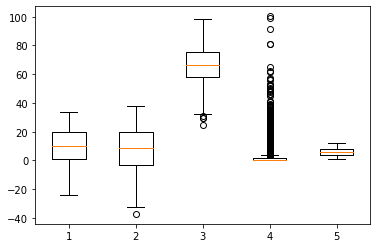

In [495]:
# 이상값 처리 후

plt.boxplot([df.temp, df.feelslike, df.humidity, df.precip, df.OFFENSE_INVOLVING_CHILDREN])
plt.show()

## Normalization

In [496]:
# MIN-MAX SCALING: 최솟값, 최대값을 이용해서 데이터의 크기를 0과 1 사이로 정규화
#변수의 크기가 상대적일 때, 해당 변수의 영향력이 제대로 표현되지 않을 수 있음

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df)
scaled_df = scaler.transform(df)

scaled_df = pd.DataFrame(scaled_df)

scaled_df.index = df.index
scaled_df.columns = df.columns

scaled_df

,temp,feelslike,humidity,precip,windspeed,cloudcover,visibility,solarenergy,THEFT,BATTERY,...,CRIMINAL_TRESPASS,WEAPONS_VIOLATION,OFFENSE_INVOLVING_CHILDREN,CRIM_SEXUAL_ASSAULT,INTERFERENCE_WITH_PUBLIC_OFFICER,SEX_OFFENSE,PROSTITUTION,ARSON,LIQUOR_LAW_VIOLATION,KIDNAPPING
datetime,,,,,,,,,,,,,,,,,,,,,
2001-01-02,0.219512,0.261682,0.771117,0.000000,0.192857,0.022,0.86250,0.000000,0.510638,0.280936,...,0.524590,0.421053,0.272727,0.222222,0.166667,0.444444,0.314286,0.000000,0.285714,0.5
2001-01-04,0.357143,0.379172,0.840599,0.000000,0.377143,0.986,0.63750,0.000000,0.588652,0.381271,...,0.426230,0.421053,0.363636,0.222222,0.500000,0.111111,0.542857,0.333333,0.571429,1.0
2001-01-08,0.320557,0.347130,0.641689,0.000000,0.192857,0.544,0.92500,0.000000,0.592199,0.444816,...,0.540984,0.210526,0.727273,0.333333,0.166667,0.666667,0.342857,1.000000,0.714286,0.5
2001-01-09,0.285714,0.309746,0.671662,0.000000,0.244286,0.223,0.92500,0.000000,0.652482,0.511706,...,0.803279,0.421053,0.181818,0.333333,0.000000,0.555556,0.428571,1.000000,0.285714,1.0
2001-01-11,0.398955,0.440587,0.685286,0.000000,0.090000,0.683,0.81250,0.000000,0.638298,0.545151,...,0.557377,0.684211,0.272727,0.444444,0.333333,0.555556,0.714286,0.666667,0.714286,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,0.433798,0.440587,0.777929,0.014385,0.325714,1.000,0.76250,0.027692,0.617021,0.264214,...,0.377049,0.421053,0.545455,0.333333,0.333333,0.222222,0.000000,0.666667,0.000000,0.0
2018-12-23,0.435540,0.449933,0.607629,0.000000,0.390000,0.916,0.85625,0.138462,0.248227,0.264214,...,0.311475,0.421053,0.454545,0.111111,0.333333,0.333333,0.000000,0.333333,0.000000,0.0
2018-12-24,0.385017,0.424566,0.501362,0.000000,0.228571,0.548,0.92500,0.196923,0.301418,0.160535,...,0.131148,0.315789,0.636364,0.333333,0.333333,0.555556,0.000000,1.000000,0.000000,0.0


In [497]:
crime.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Datetime', 'weekday', 'month', 'day', 'hour'],
      dtype='object')





## 6. Correlation Analysis

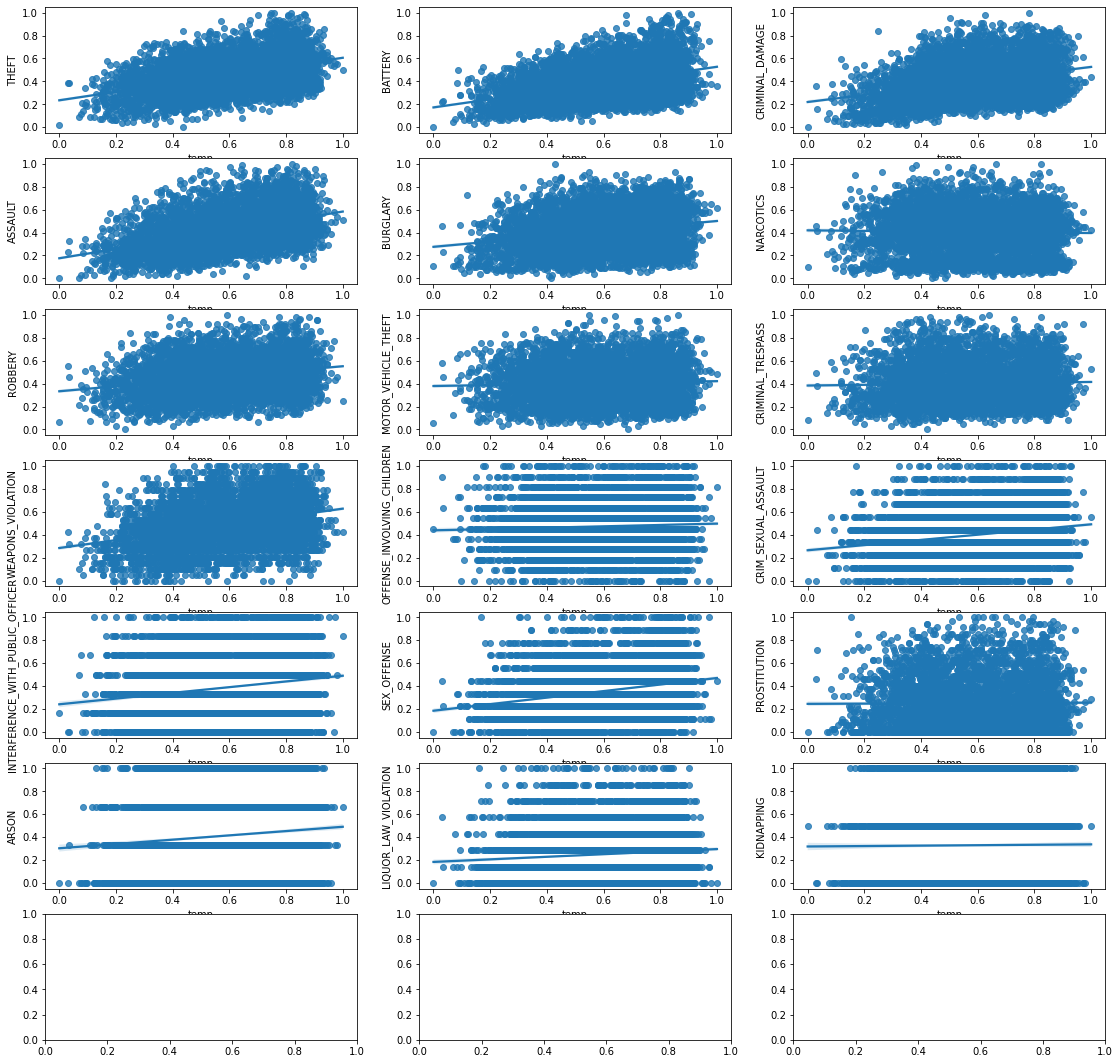

In [498]:
#회귀 분석 결과를 산점도 + 선형회귀 그래프로 시각화하기
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize = (19,19), ncols = 3, nrows = 7)

y_features = ['THEFT', 'BATTERY', 'CRIMINAL_DAMAGE', 'ASSAULT', 'BURGLARY', 'NARCOTICS', 'ROBBERY', 'MOTOR_VEHICLE_THEFT', 
              'CRIMINAL_TRESPASS', 'WEAPONS_VIOLATION', 'OFFENSE_INVOLVING_CHILDREN', 'CRIM_SEXUAL_ASSAULT', 
              'INTERFERENCE_WITH_PUBLIC_OFFICER', 'SEX_OFFENSE', 'PROSTITUTION', 'ARSON', 'LIQUOR_LAW_VIOLATION', 'KIDNAPPING'
             ]

for i, feature in enumerate(y_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x = 'temp', y = feature, data = scaled_df, ax = axs[row][col])

<AxesSubplot:>

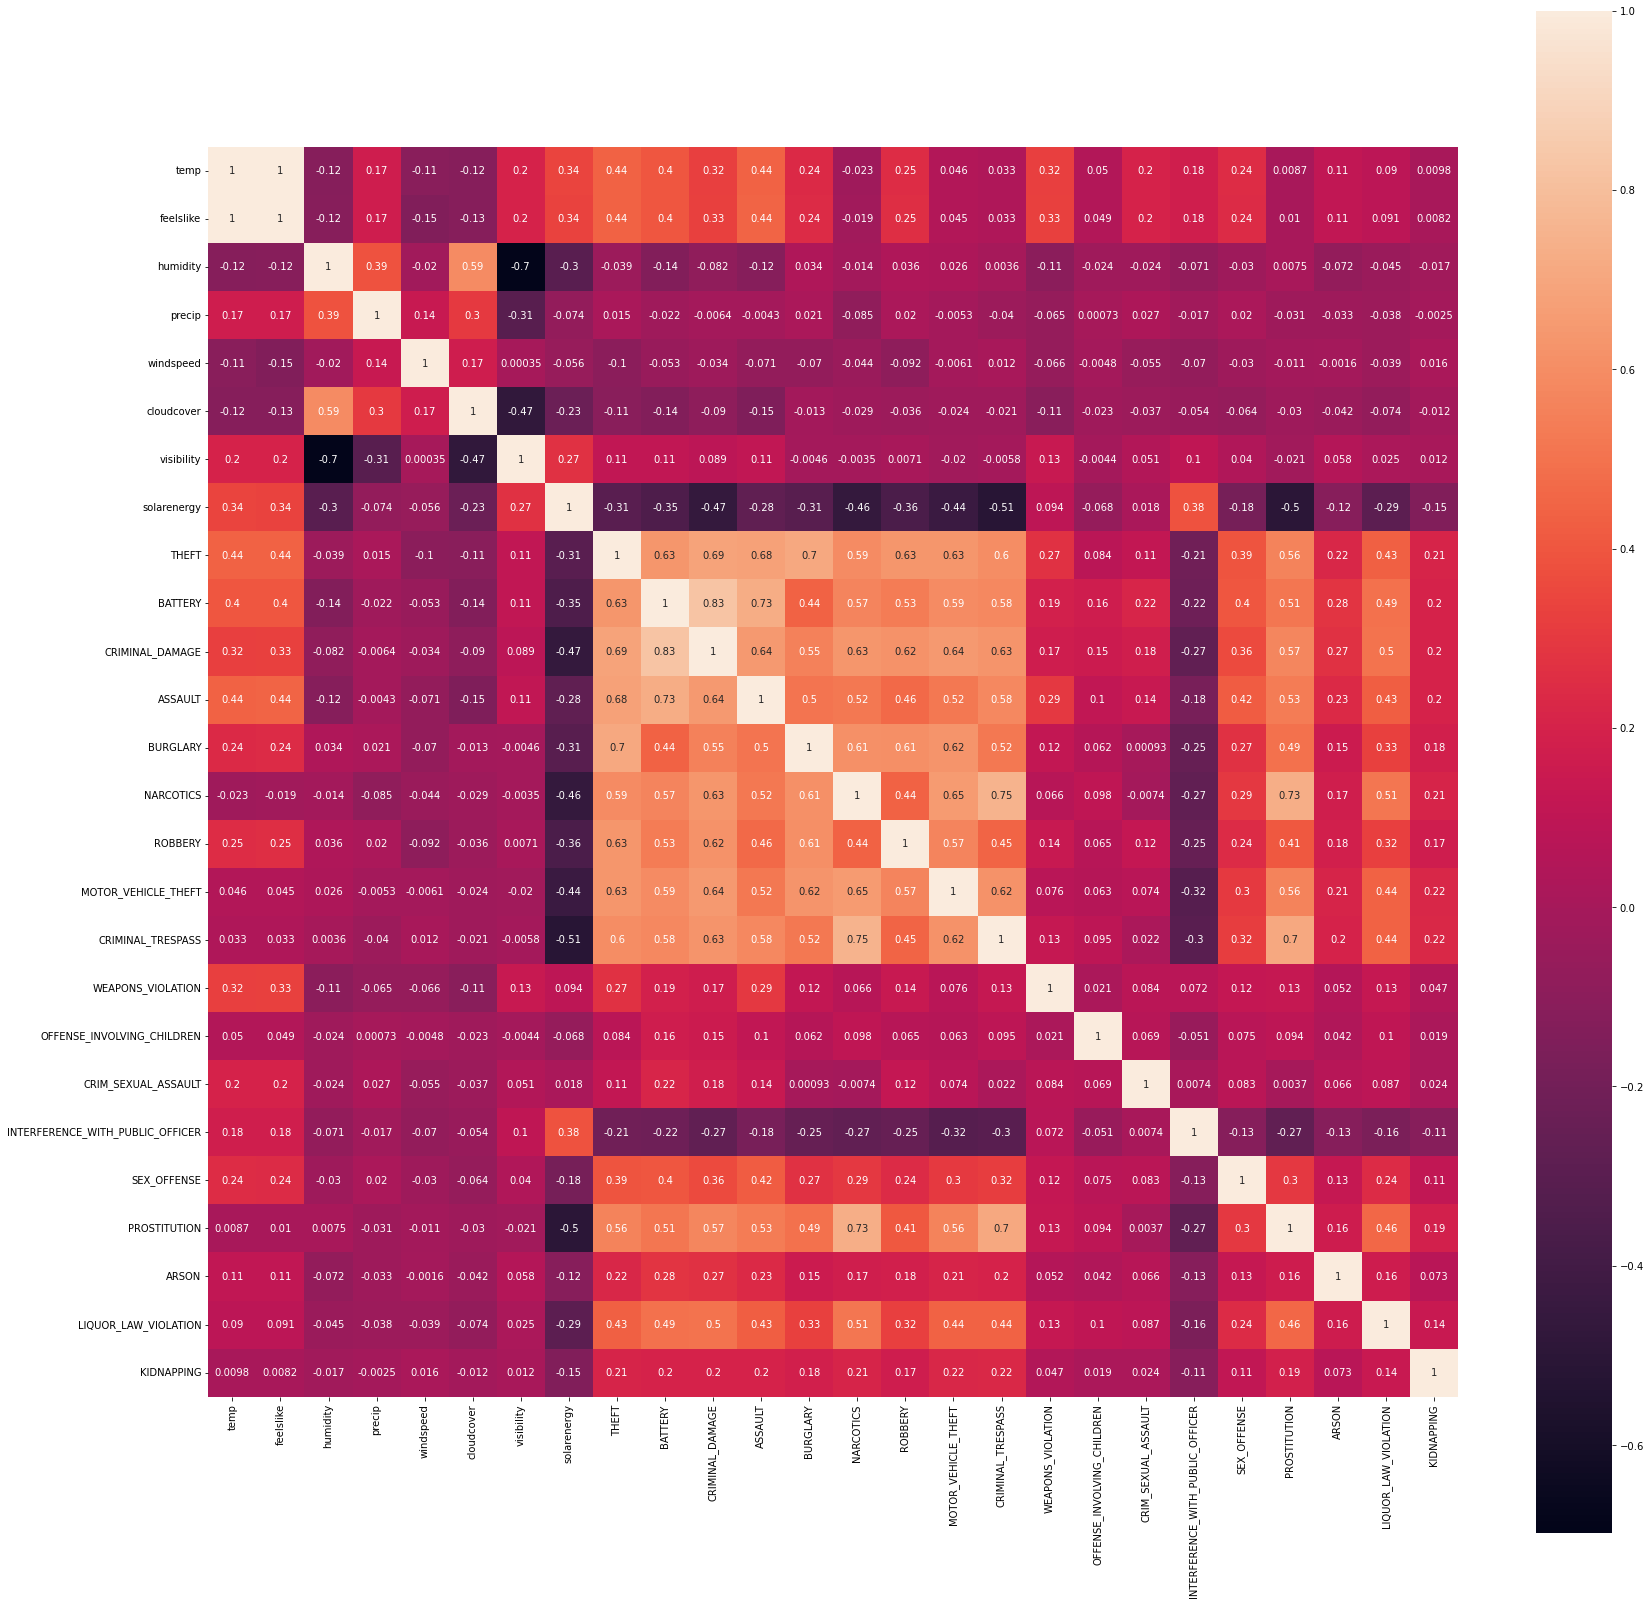

In [499]:
cor = scaled_df.corr()
plt.figure(figsize=(28,28))
sns.heatmap(cor, vmax=1,square=True,annot=True)

## delete some unusable columns

in heatmap, there are some columns that have lower correlation ( -0.3 ~ 0.3 )
drop them.

furthermore,
'INTERFERENCE_WITH_PUBLIC_OFFICER' column has high correlation with only 'solarenergy' column, because most of the working time is during the day. So, drop it.

also,
'feelslike' columns has very high correlation with temp. so drop it, too.

In [500]:
scaled_df.drop(['feelslike', 'INTERFERENCE_WITH_PUBLIC_OFFICER', 'BURGLARY', 'WEAPONS_VIOLATION', 'OFFENSE_INVOLVING_CHILDREN', 'CRIM_SEXUAL_ASSAULT' , 'SEX_OFFENSE', 
                'ARSON',  'LIQUOR_LAW_VIOLATION', 'KIDNAPPING'],axis=1, inplace=True)
df.drop(['feelslike', 'INTERFERENCE_WITH_PUBLIC_OFFICER', 'BURGLARY', 'WEAPONS_VIOLATION', 'OFFENSE_INVOLVING_CHILDREN', 'CRIM_SEXUAL_ASSAULT' , 'SEX_OFFENSE', 
                'ARSON',  'LIQUOR_LAW_VIOLATION', 'KIDNAPPING'],axis=1, inplace=True)

In [501]:
scaled_df.columns

Index(['temp', 'humidity', 'precip', 'windspeed', 'cloudcover', 'visibility',
       'solarenergy', 'THEFT', 'BATTERY', 'CRIMINAL_DAMAGE', 'ASSAULT',
       'NARCOTICS', 'ROBBERY', 'MOTOR_VEHICLE_THEFT', 'CRIMINAL_TRESPASS',
       'PROSTITUTION'],
      dtype='object')

<AxesSubplot:>

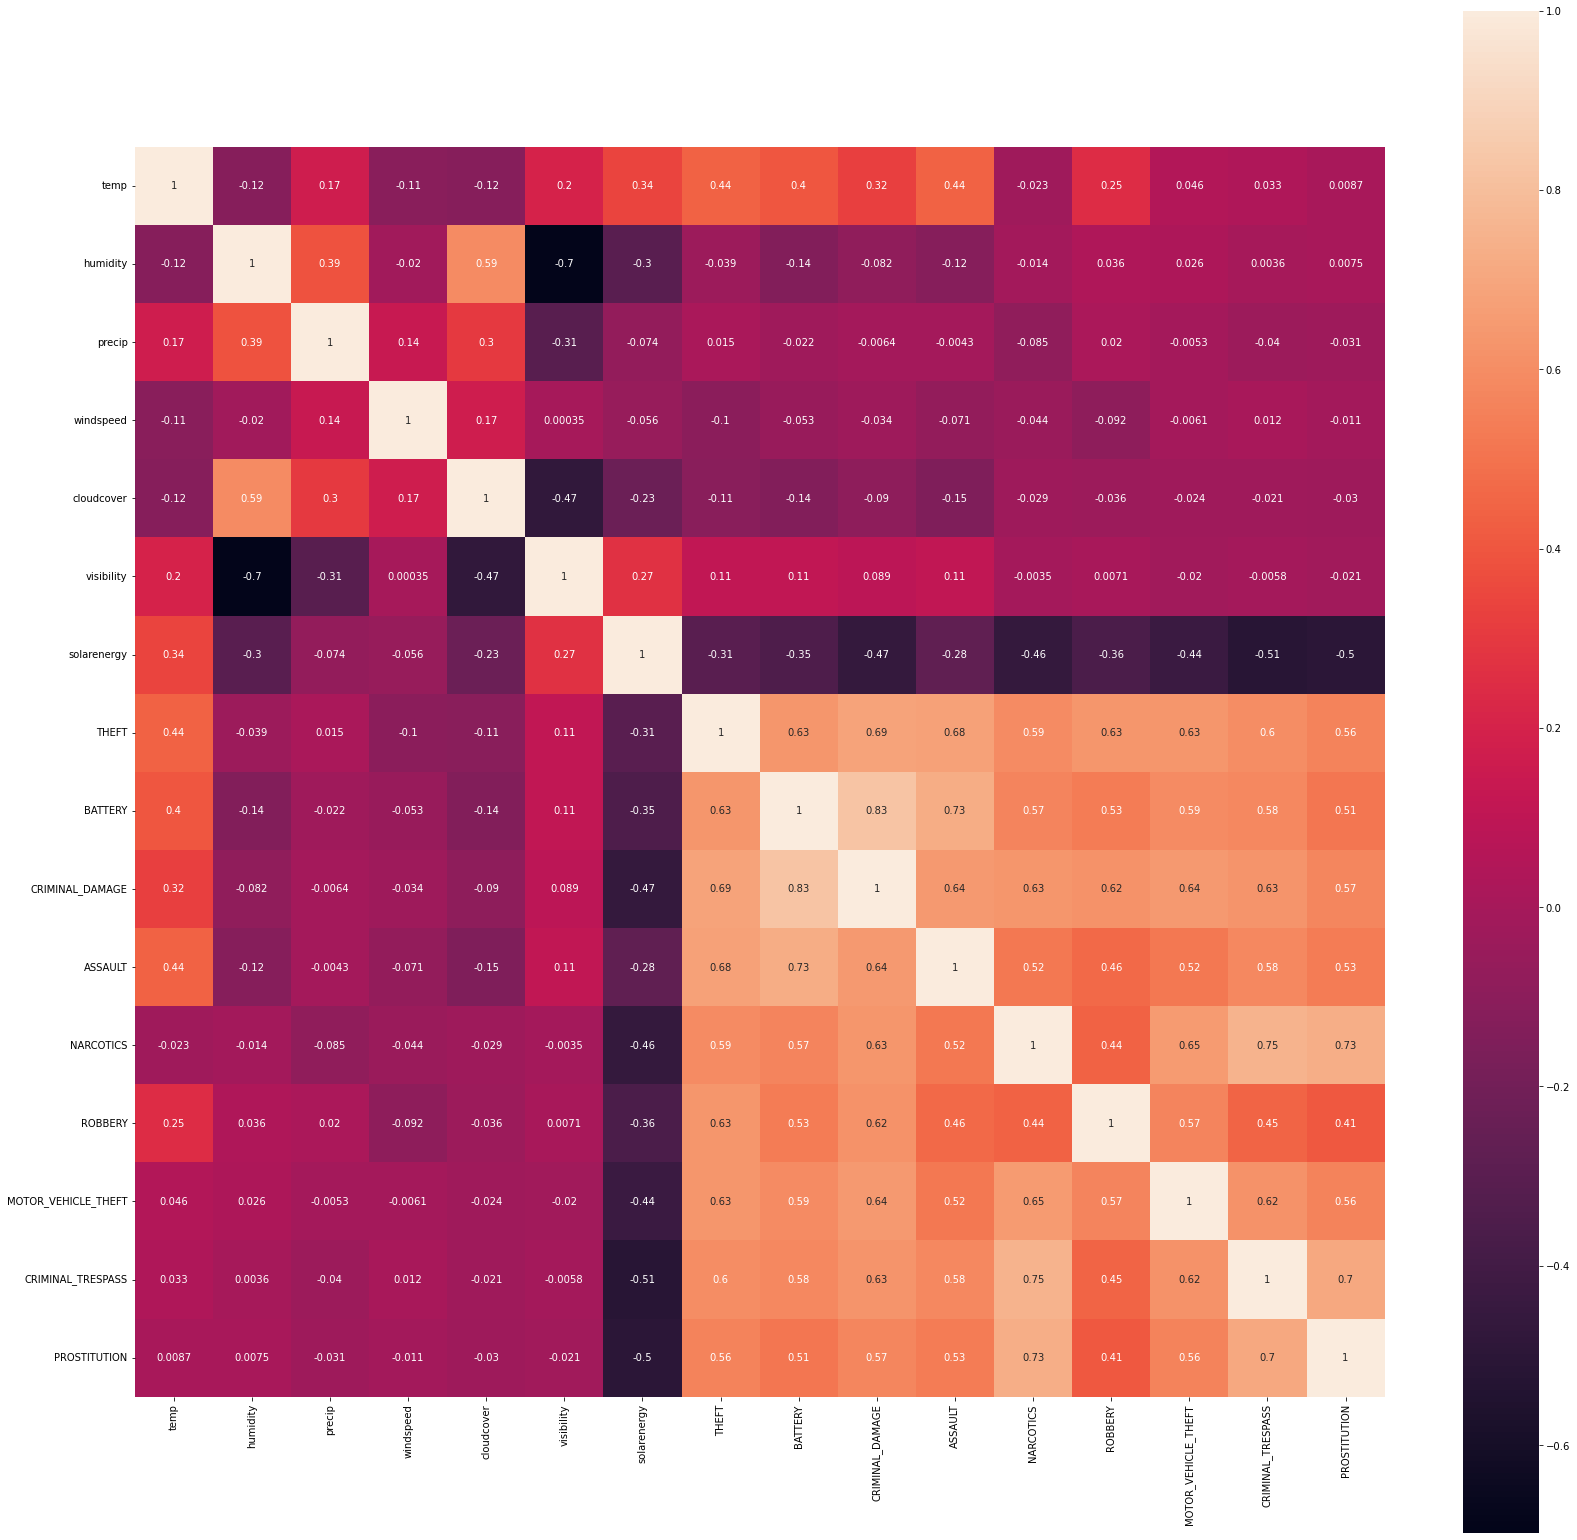

In [502]:
cor = scaled_df.corr()
plt.figure(figsize=(28,28))
sns.heatmap(cor, vmax=1,square=True,annot=True)

Given that most crimes take place at night when there's no 'solarenergy',
only 'THEFT', 'BATTERY', 'CRIMINAL_DAMAGE', 'ASSAULT' column have high correlation with temperature ( >= 0.3 )

In [503]:
# from sklearn.model_selection import train_test_split
# import sklearn
# import numpy as np
# import matplotlib.pyplot as plt

# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split

# X=scaled_df[['temp', 'feelslike', 'humidity', 'precip', 'windspeed', 'cloudcover',
#        'visibility', 'solarenergy']]
# y=scaled_df['ASSAULT']

# ## LinearRegression 클래스 생성
# lr = LinearRegression() ## 절편항 있는 회귀 모형, False 절편항 제외
# lr.fit(X, y) ## 모형 적합
# lr.score(X, y)

In [504]:
THEFT

Date
2001-01-01    412
2001-01-02    221
2001-01-03    226
2001-01-04    243
2001-01-05    265
             ... 
2018-12-27    171
2018-12-28    187
2018-12-29    145
2018-12-30    142
2018-12-31    160
Name: Primary Type, Length: 6574, dtype: int64

In [505]:
# 전체 범죄의 개수 시각화

plt.figure(figsize=(12,6))
dfr = pd.DataFrame({'THEFT':THEFT/float(THEFT.max()),
                    'BATTERY':BATTERY/float(BATTERY.max()),
                    'CRIMINAL_DAMAGE':CRIMINAL_DAMAGE/float(CRIMINAL_DAMAGE.max()),
                    'ASSAULT':ASSAULT/float(ASSAULT.max())
                    })

# max scaling을 해줘서 0-1 사이의 값으로 맞춰준 것 같음

# daily = dfr.resample('d')  #Datetime Index를 day 기준으로 나누어주는 메소드 - daily plot을 불러오는 데 시간이 너무 많이 소요되며, 과적합 발생
# daily.plot()

<Figure size 864x432 with 0 Axes>

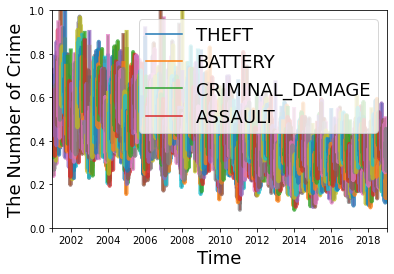

In [506]:
monthly = dfr.resample('M')  #Datetime Index를 month 기준으로 나누어주는 메소드 
dfr
monthly.plot()

ax = monthly.plot(lw=4,alpha=.75) 
plt.xlabel('Time',fontsize=18)
plt.ylabel('The Number of Crime',fontsize=18)
plt.ylim((0,1))
plt.legend(['THEFT', 'BATTERY', 'CRIMINAL_DAMAGE', 'ASSAULT' ], loc='upper right', fontsize=18)

#온도와 연관성이 높은 네가지 범죄의 변화 추이를 현재까지 시각화 한 자료인데... 굳이 필요할까 싶음 그냥 하락세를 보인다 정도만 보여서!

In [507]:
df

,temp,humidity,precip,windspeed,cloudcover,visibility,solarenergy,THEFT,BATTERY,CRIMINAL_DAMAGE,ASSAULT,NARCOTICS,ROBBERY,MOTOR_VEHICLE_THEFT,CRIMINAL_TRESPASS,PROSTITUTION
datetime,,,,,,,,,,,,,,,,
2001-01-02,-11.2,81.3,0.000,21.5,2.2,15.0,0.0,221,143,118,66,175,35,65,35,11.0
2001-01-04,-3.3,86.4,0.000,34.4,98.6,11.4,0.0,243,173,133,57,142,55,87,29,19.0
2001-01-08,-5.4,71.8,0.000,21.5,54.4,16.0,0.0,244,192,104,67,161,44,62,36,12.0
2001-01-09,-7.4,74.0,0.000,25.1,22.3,16.0,0.0,261,212,120,63,115,38,65,52,15.0
2001-01-11,-0.9,75.0,0.000,14.3,68.3,14.2,0.0,257,222,111,89,160,34,59,37,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,1.1,81.8,1.443,30.8,100.0,13.4,0.9,251,138,64,51,30,32,26,26,0.0
2018-12-23,1.2,69.3,0.000,35.3,91.6,14.9,4.5,147,138,87,46,25,29,27,22,0.0
2018-12-24,-1.7,61.5,0.000,24.0,54.8,16.0,6.4,162,107,65,51,16,25,19,11,0.0


## 시계열 분석 및 예측

In [508]:
origin_df['Date'] = origin_df.index
origin_df

,temp,feelslike,humidity,precip,windspeed,cloudcover,visibility,solarenergy,THEFT,BATTERY,...,WEAPONS_VIOLATION,OFFENSE_INVOLVING_CHILDREN,CRIM_SEXUAL_ASSAULT,INTERFERENCE_WITH_PUBLIC_OFFICER,SEX_OFFENSE,PROSTITUTION,ARSON,LIQUOR_LAW_VIOLATION,KIDNAPPING,Date
datetime,,,,,,,,,,,,,,,,,,,,,
2001-01-01,-7.6,-12.7,76.0,0.000,20.9,50.2,15.5,NaN,412,296,...,32.0,100.0,38.0,1.0,65.0,5.0,NaN,3.0,2.0,2001-01-01
2001-01-02,-11.2,-17.6,81.3,0.000,21.5,2.2,15.0,NaN,221,143,...,9.0,4.0,2.0,1.0,4.0,11.0,NaN,2.0,1.0,2001-01-02
2001-01-03,-6.2,-13.0,86.5,0.000,26.9,93.5,7.4,NaN,226,165,...,7.0,3.0,7.0,NaN,5.0,16.0,1.0,2.0,3.0,2001-01-03
2001-01-04,-3.3,-8.8,86.4,0.000,34.4,98.6,11.4,NaN,243,173,...,9.0,5.0,2.0,3.0,1.0,19.0,1.0,4.0,2.0,2001-01-04
2001-01-05,0.5,-4.8,71.2,6.069,33.5,43.0,15.5,NaN,265,178,...,6.0,9.0,6.0,2.0,2.0,16.0,3.0,8.0,3.0,2001-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,7.5,4.3,82.0,14.123,34.9,99.6,13.6,0.7,171,92,...,19.0,7.0,1.0,3.0,2.0,5.0,NaN,NaN,1.0,2018-12-27
2018-12-28,3.1,-1.6,83.0,0.575,38.0,98.9,13.6,1.9,187,119,...,20.0,6.0,3.0,2.0,2.0,3.0,NaN,1.0,3.0,2018-12-28
2018-12-29,-1.9,-5.8,86.3,0.628,25.7,100.0,11.8,0.8,145,142,...,21.0,4.0,3.0,4.0,1.0,NaN,2.0,1.0,1.0,2018-12-29


In [509]:
origin_df['Time'] = range((max(origin_df.index)-min(origin_df.index)).days+1)

origin_df['Weekday'] = origin_df['Date'].apply(lambda x:x.weekday())
origin_df['Hour'] = origin_df['Date'].apply(lambda x:x.hour)
origin_df['Week'] = origin_df['Date'].apply(lambda x:x.week)
origin_df['Month'] = origin_df['Date'].apply(lambda x:x.month)
origin_df['Year'] = origin_df['Date'].apply(lambda x:x.year)
origin_df['Weekend'] = origin_df['Weekday'].isin([5,6]).astype(int)

(0.0, 365.0)

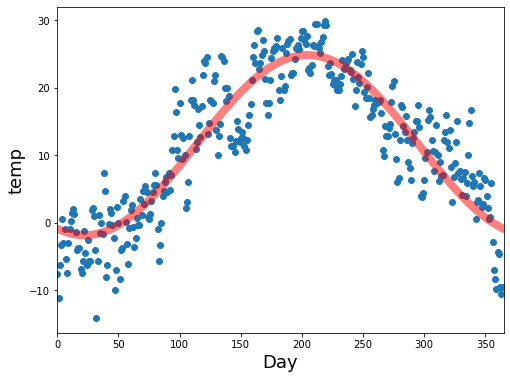

In [510]:
import statsmodels.formula.api as smf
from scipy.optimize import curve_fit
from statsmodels.sandbox.regression.predstd import wls_prediction_std

def sinfunc(x,a,b,c):
    return a*np.sin(2*np.pi/365.*x+b)+c

y2001 = np.array(origin_df['temp']['2001-1-1':'2001-12-31'])
x = np.arange(len(y2001))
fitpars,covmat =  curve_fit(f=sinfunc,xdata=x,ydata=y2001)

plt.figure(figsize=(8,6))
plt.scatter(x,y2001)
y = sinfunc(x,*fitpars)
plt.plot(x,y,'r-',lw=8,alpha=.5)
plt.ylabel('temp',fontsize=18)
plt.xlabel('Day',fontsize=18)
plt.xlim((0,365))

In [511]:
for y in range(2001,2015):
    y_i = np.array(origin_df['temp']['{0}-1-1'.format(y):'{0}-12-31'.format(y)])
    y_i = np.nan_to_num(y_i)
    x = np.arange(len(y_i))
    try:
        fitpars_i,covmat =  curve_fit(f=sinfunc,xdata=x,ydata=y_i)
    except RuntimeError:
        print ("Couldn't find estimates for {0}".format(y))
        pass
    fitpars = np.vstack([fitpars,fitpars_i])
    
avg_params = fitpars.mean(axis=0)

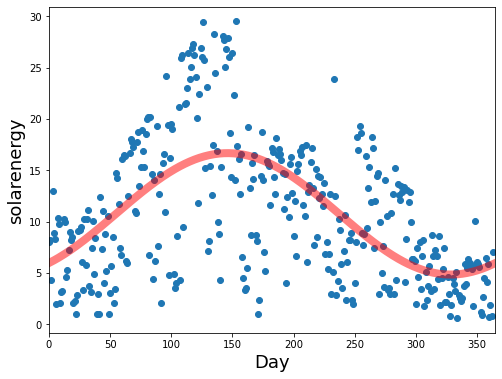

In [512]:
y2001_solar = np.array(origin_df['solarenergy']['2018-1-1':'2018-12-30'])
x = np.arange(len(y2001_solar))
fitpars,covmat =  curve_fit(f=sinfunc,xdata=x,ydata=y2001_solar)

plt.figure(figsize=(8,6))
plt.scatter(x,y2001_solar)
y_s = sinfunc(x,*fitpars)
plt.plot(x,y_s,'r-',lw=8,alpha=.5)
plt.ylabel('solarenergy',fontsize=18)
plt.xlabel('Day',fontsize=18)
plt.xlim((0,365))

for y_s in range(2001,2015):
    y_i_s = np.array(origin_df['solarenergy']['{0}-1-1'.format(y):'{0}-12-31'.format(y)])
    y_i_s = np.nan_to_num(y_i_s)
    x = np.arange(len(y_i_s))
    try:
        fitpars_i,covmat =  curve_fit(f=sinfunc,xdata=x,ydata=y_i_s)
    except RuntimeError:
        print ("Couldn't find estimates for {0}".format(y_s))
        pass
    fitpars = np.vstack([fitpars,fitpars_i])
    
avg_params_solar = fitpars.mean(axis=0)

In [513]:
origin_df.columns

Index(['temp', 'feelslike', 'humidity', 'precip', 'windspeed', 'cloudcover',
       'visibility', 'solarenergy', 'THEFT', 'BATTERY', 'CRIMINAL_DAMAGE',
       'ASSAULT', 'BURGLARY', 'NARCOTICS', 'ROBBERY', 'MOTOR_VEHICLE_THEFT',
       'CRIMINAL_TRESPASS', 'WEAPONS_VIOLATION', 'OFFENSE_INVOLVING_CHILDREN',
       'CRIM_SEXUAL_ASSAULT', 'INTERFERENCE_WITH_PUBLIC_OFFICER',
       'SEX_OFFENSE', 'PROSTITUTION', 'ARSON', 'LIQUOR_LAW_VIOLATION',
       'KIDNAPPING', 'Date', 'Time', 'Weekday', 'Hour', 'Week', 'Month',
       'Year', 'Weekend'],
      dtype='object')

In [514]:
theft_ols = smf.ols('THEFT ~ temp  + Time + C(Week) + C(Weekday)',data=origin_df.interpolate(method='pad')).fit()

theft_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  THEFT   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     263.7
Date:                Wed, 30 Nov 2022   Prob (F-statistic):               0.00
Time:                        01:48:32   Log-Likelihood:                -31329.
No. Observations:                6574   AIC:                         6.278e+04
Df Residuals:                    6513   BIC:                         6.319e+04
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         264.5756      2.744     96.409      0.000     259.196     269.955
C(Week)[T.2]       -9.1097      3.589     -2.538      0.011     -16.145      -2.074
C(Week)[T.3]       -7.1220      3.590     -1.984      0.047     -14.159      -0.085
C(Week)[T.4]      -12.4967      3.589     -3.482      0.001     -19.532      -5.462
C(Week)[T.5]      -16.0069      3.589     -4.460      0.000     -23.042      -8.972
C(Week)[T.6]      -26.0489      3.590     -7.256      0.000     -33.086     -19.011
C(Week)[T.7]      -23.0702      3.590     -6.427      0.000     -30.108     -16.033
C(Week)[T.8]      -23.0082      3.594     -6.402      0.000     -30.054     -15.962
C(Week)[T.9]      -13.1834      3.593     -3.670      0.000     -20.226      -6.141
C(Week)[T.10]     -18.4283      3.608     -5.107      0.000     -25.502     -11.355
C(Week)[T.11]     -10.0931      3.631     -2.780      0.005     -17.211      -2.976
C(Week)[T.12]     -13.2443      3.638     -3.641      0.000     -20.376      -6.113
C(Week)[T.13]      -6.5947      3.663     -1.800      0.072     -13.775       0.586
C(Week)[T.14]      -4.0764      3.671     -1.110      0.267     -11.272       3.120
C(Week)[T.15]     -10.1001      3.716     -2.718      0.007     -17.385      -2.815
C(Week)[T.16]      -6.4446      3.748     -1.719      0.086     -13.792       0.903
C(Week)[T.17]      -4.2903      3.745     -1.146      0.252     -11.631       3.050
C(Week)[T.18]      -0.3610      3.792     -0.095      0.924      -7.795       7.073
C(Week)[T.19]      -3.6888      3.825     -0.964      0.335     -11.188       3.810
C(Week)[T.20]       1.3879      3.851      0.360      0.719      -6.161       8.937
C(Week)[T.21]       0.6536      3.898      0.168      0.867      -6.989       8.296
C(Week)[T.22]       2.8270      3.961      0.714      0.475      -4.938      10.592
C(Week)[T.23]       4.0540      3.961      1.024      0.306      -3.711      11.819
C(Week)[T.24]       8.5415      4.044      2.112      0.035       0.614      16.469
C(Week)[T.25]       9.6698      4.061      2.381      0.017       1.709      17.631
C(Week)[T.26]      14.1187      4.089      3.453      0.001       6.103      22.134
C(Week)[T.27]       9.7591      4.109      2.375      0.018       1.703      17.815
C(Week)[T.28]      25.4101      4.114      6.176      0.000      17.345      33.475
C(Week)[T.29]      29.3004      4.151      7.058      0.000      21.162      37.439
C(Week)[T.30]      29.2880      4.111      7.124      0.000      21.229      37.347
C(Week)[T.31]      35.5496      4.139      8.588      0.000      27.435      43.664
C(Week)[T.32]      21.3509      4.108      5.197      0.000      13.297      29.405
C(Week)[T.33]      29.2492      4.066      7.193      0.000      21.278      37.221
C(Week)[T.34]      21.1506      4.073      5.193      0.000

In [515]:
theft_ols_x = pd.DataFrame({'Date':pd.date_range('2001-01-01','2021-12-31')})
theft_ols_x['temp'] = sinfunc(np.arange(len(theft_ols_x)),*avg_params)
theft_ols_x['solarenergy'] = sinfunc(np.arange(len(theft_ols_x)),*avg_params_solar)
theft_ols_x['Month'] = theft_ols_x['Date'].apply(lambda x:x.month)
theft_ols_x['Week'] = theft_ols_x['Date'].apply(lambda x:x.week)
theft_ols_x['Weekday'] = theft_ols_x['Date'].apply(lambda x:x.weekday())
theft_ols_x['Time'] = np.arange(len(theft_ols_x))
theft_ols_x = theft_ols_x.set_index('Date')

std,lower,upper = wls_prediction_std(theft_ols)

start_date = '2001-01-01'
theft_pred = pd.DataFrame(index = pd.date_range(start_date,'2019-12-31'))
theft_pred['Predictions'] = theft_ols.predict(theft_ols_x[start_date:])
theft_pred['Observations'] = origin_df['THEFT'].loc[start_date:'2016-12-31']
theft_pred

,Predictions,Observations
2001-01-01,270.337205,412.0
2001-01-02,270.703218,221.0
2001-01-03,271.875460,226.0
2001-01-04,268.772874,243.0
2001-01-05,285.357254,265.0
...,...,...
2019-12-27,136.905576,NaN
2019-12-28,116.725642,NaN
2019-12-29,90.680793,NaN
2019-12-30,140.429380,NaN


Text(0.5, 1.0, 'Comparison of model predictions and observed data')

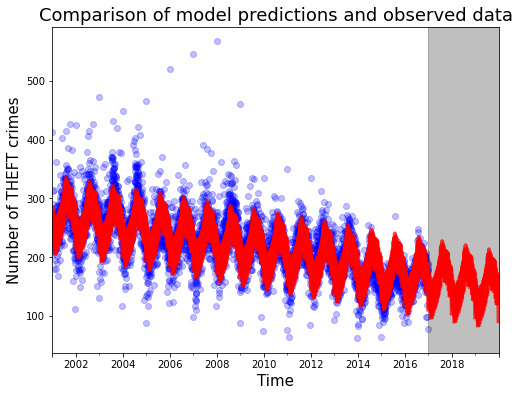

In [516]:
theft_pred['Predictions'].resample('W').plot(c='r',lw=4,alpha=.75,label='Predictions',figsize=(8,6))
#plt.plot(assault_pred.index,assault_pred['Lower_CI'])
#plt.figure(figsize=(8,6))
plt.scatter(theft_pred.index,theft_pred['Observations'],c='b',alpha=.25,label='Observations')

plt.ylabel('Number of THEFT crimes',fontsize=15)
plt.xlabel('Time',fontsize=15)
plt.axvspan(xmin='2016-12-31',xmax='2019-12-31',color='k',alpha=.25)
#plt.legend()
plt.title('Comparison of model predictions and observed data',fontsize=18)

In [517]:

THEFT = origin_crime[origin_crime['Primary Type'] == 'THEFT'].groupby('Date')['Primary Type'].agg(len)

THEFT.index.name = None
THEFT.index = pd.to_datetime(THEFT.index)
THEFT = THEFT[:'2019-12-31']

ValueError: 'Date' is both an index level and a column label, which is ambiguous.

In [ ]:
plt.scatter(THEFT.index,THEFT,c='b',alpha=.25,label='Observations')
theft_pred['Predictions'].resample('W').plot(c='r',lw=4,alpha=.75,label='Predictions',figsize=(8,6)) 
plt.ylabel('Number of THEFT crimes',fontsize=15)
plt.xlabel('Time',fontsize=15)
plt.axvspan(xmin='2016-12-31',xmax='2019-12-31',color='k',alpha=.1)
#plt.legend()
plt.title('Comparison of model predictions and observed data',fontsize=18)

## Another Analysis using ARIMA

In [ ]:
df_Theft = origin_df[['THEFT']]

df_Theft

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_Theft['THEFT'], model = 'additive')

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(200, 15)

Not certain trend, but some seasonality

ACF test for check stationality

In [ ]:
import statsmodels.api as sm

fig = plt.figure(figsize=(20,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_Theft, lags=50, ax=ax1)

Cannot say there is stationality

so, for obtain stationality in data, so implement differencing

In [ ]:
theft_diff = df_Theft - df_Theft.shift()
plt.figure(figsize = (22, 8))
plt.plot(theft_diff)
plt.show()

In [ ]:
theft_diff = theft_diff[1:]
theft_diff

In [ ]:
fig = plt.figure(figsize=(20,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(theft_diff, lags=50, ax=ax1)

In [ ]:
result = adfuller(theft_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values: ')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

After differencing, now we can see stationality

so d = 1

In [ ]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(theft_diff, lags = 20, ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(theft_diff, lags = 20, ax = ax2)

d = 4, q = 2

As a result, parameters for ARIMA test are determined, implement ARIMA modeling

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pandas import datetime

model = ARIMA(df_Theft, order=(4,1,2))
model_fit = model.fit()

start_index = datetime(2015, 12, 31)
end_index = datetime(2018, 12, 31)
forecast = model_fit.predict(start=start_index, end=end_index, typ='levels')

plt.figure(figsize=(22,8))
plt.plot(df_Theft[:'2015-12-31'].index, df_Theft[:'2015-12-31']['THEFT'], label='original')
plt.plot(forecast, label = 'predicted')
plt.xlabel('Date')
plt.ylabel('THEFT')
plt.legend()
plt.show()

we can get prediction model that follows certain trend of original data

## 7. 회귀분석
날씨 변수로 각 범죄의 발생횟수를 회귀 모델로 예측
독립변수 간의 강한 상관관계가 존재(0.9이상)하면 다중 회귀분석의 독립변수의 적합도가 떨어짐
머신러닝의 프로세스 1->2->3

Train 함수로 - 회귀분석 모델을 만들고

Predict 함수로 - 그 모델을 가지고 예측해봄

Evaluate 함수로 - 그리고 그 예측 결과의 정확도를 계산함

In [ ]:

from sklearn.model_selection import train_test_split
#학습에 사용할 feature 선정 후 train/test분리(default 75:25)


#경고 무시
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
X=scaled_df[['temp','windspeed','visibility', 'solarenergy']] #temp, humidity, precip, windspeed, cloudcover, visibility, solarenergy
y=scaled_df[['THEFT']]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model as lm
import xgboost as xgb
from scipy.stats import uniform, randint

warnings.filterwarnings(action='ignore')

models = [
    ('lr', lm.LinearRegression(n_jobs=-1)),
    ('ridge', lm.Ridge()),
    ('lasso', lm.Lasso()),
    ('elastic', lm.ElasticNet()),
    ('LassoLars', lm.LassoLars()),
    #('LogisticRegression', lm.LogisticRegression(C=1, penalty='l1', solver='liblinear')),
    ('SGDRegressor', lm.SGDRegressor()),
    #('Perceptron', lm.Perceptron(n_jobs=-1)),
    ('xgboost', xgb.XGBRegressor())
]
n = 3
params = {
    'lr' : {
        'fit_intercept': [True, False],
        'normalize': [True, False],
    },
    'ridge': {
        'alpha': [0.01, 0.1, 1.0, 10, 100],
        'fit_intercept': [True, False],
        'normalize': [True, False],
    },
    'lasso': {
        'alpha': [0.1, 1.0, 10],
        'fit_intercept': [True, False],
        'normalize': [True, False],
    },
    'elastic': {
        'alpha': [0.1, 1.0, 10],
        'normalize': [True, False],
        'fit_intercept': [True, False],
    },
    'LassoLars': {
        'alpha': [0.1, 1.0, 10],
        'normalize': [True, False],
        'fit_intercept': [True, False],
    },
    'SGDRegressor': {
        'penalty': ['l1', 'l2'],
        'alpha': [0.001, 0.01, 0.1, 1.0, 10, 100],
        'fit_intercept': [True, False],
    },
    'xgboost': {
        "gamma": uniform(0, 0.5).rvs(n),
        "max_depth": range(2, 7), # default 3
        "n_estimators": randint(100, 150).rvs(n), # default 100
    }
}

best_model, best_mae = None, float('inf')
for model_name, model in models:
    param_grid = params[model_name]
    grid = GridSearchCV(model, cv=5, n_jobs=-1, param_grid=param_grid)
    grid = grid.fit(X_train, y_train)

    model = grid.best_estimator_
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)

    print(model_name, mae)

    if mae < best_mae:
        best_model = model


In [ ]:
#라쏘가 가장 성능 좋음

In [ ]:
#LinearRegression 진행
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
# r-square 함수사용
r2_score(y_test, y_pred)

In [ ]:
import statsmodels.api as sm
X_data = sm.add_constant(X, has_constant='add')
lr_check = sm.OLS(y,X_data)
result = lr_check.fit()
result.summary()

In [ ]:
#범죄들 간의 회귀분석
X=scaled_df[['BATTERY','CRIMINAL_DAMAGE','ASSAULT','NARCOTICS','ROBBERY','MOTOR_VEHICLE_THEFT','CRIMINAL_TRESPASS','PROSTITUTION']]
y=scaled_df[['THEFT']]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [ ]:
#LinearRegression 진행
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
# r-square 함수사용
r2_score(y_test, y_pred)

In [ ]:
import statsmodels.api as sm
X_data = sm.add_constant(X, has_constant="add")
lr_check = sm.OLS(y,X_data)
result = lr_check.fit()
result.summary()

## Another linear regression 

In [ ]:
#혹시 범죄의 종류가 아니라 위치 장소에 따른 영향은 어떨까?
#특정 날씨에 어디에서 범죄가 자주 발생하는지  > 그럼 이게 의미가 있다면
#어떤 장소에 어떤 범죄가 가장 의미가 있는지 의사결정나무로 확인할 수 있음(예를 들어 비오는 날에는 레스토랑에서 폭행이 많다 등)


In [ ]:
crime['Location Description'].value_counts() #많은 장소 4개만 뽑아

In [ ]:
STREET = crime[crime['Location Description'] == 'STREET'].groupby('Date')['Location Description'].agg(len)
STREET.index = pd.to_datetime(STREET.index)
RESIDENCE = crime[crime['Location Description'] == 'RESIDENCE'].groupby('Date')['Location Description'].agg(len)
RESIDENCE.index = pd.to_datetime(RESIDENCE.index)
APARTMENT = crime[crime['Location Description'] == 'APARTMENT'].groupby('Date')['Location Description'].agg(len)
APARTMENT.index = pd.to_datetime(APARTMENT.index)
SIDEWALK = crime[crime['Location Description'] == 'SIDEWALK'].groupby('Date')['Location Description'].agg(len)
SIDEWALK.index = pd.to_datetime(SIDEWALK.index)

In [ ]:
#merge함수를 이용하여 공통 컬럼을 기준으로 데이터를 합친다
#기준이 되는 컬럼(Datetime)이 key이다
df_1 = pd.merge(weather, STREET, left_index=True, right_index=True, how='left')
df_1 = df_1.rename(columns={'Location Description':'STREET'})

df_1 = pd.merge(df_1, RESIDENCE, left_index=True, right_index=True, how='left')
df_1 = df_1.rename(columns={'Location Description':'RESIDENCE'})

df_1 = pd.merge(df_1, APARTMENT, left_index=True, right_index=True, how='left')
df_1 = df_1.rename(columns={'Location Description':'APARTMENT'})

df_1 = pd.merge(df_1, SIDEWALK, left_index=True, right_index=True, how='left')
df_1 = df_1.rename(columns={'Location Description':'SIDEWALK'})

df_1

In [ ]:
df_1= df_1.fillna(0)

In [ ]:
df_1.dtypes

In [ ]:
cor = df_1.corr()
plt.figure(figsize=(28,28))
sns.heatmap(cor, vmax=1,square=True,annot=True)


In [ ]:
from sklearn.model_selection import train_test_split
#학습에 사용할 feature 선정 후 train/test분리(default 75:25)
X=df_1[['temp','feelslike','humidity','visibility']] #temp, humidity, precip, windspeed, cloudcover, visibility, solarenergy
y=df_1[['STREET']]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [ ]:
#LinearRegression 진행
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)
# r-square 함수사용
r2_score(y_test, y_pred)

In [ ]:
import statsmodels.api as sm
X_data = sm.add_constant(X, has_constant='add')
lr_check = sm.OLS(y,X_data)
result = lr_check.fit()
result.summary()

In [ ]:
from sklearn.model_selection import train_test_split
#학습에 사용할 feature 선정 후 train/test분리(default 75:25)
X=df_1[['temp','feelslike','humidity','visibility']] #temp, humidity, precip, windspeed, cloudcover, visibility, solarenergy
y=df_1[['STREET']]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [ ]:
#LinearRegression 진행
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)
# r-square 함수사용
r2_score(y_test, y_pred)

In [ ]:
import statsmodels.api as sm
X_data = sm.add_constant(X, has_constant='add')
lr_check = sm.OLS(y,X_data)
result = lr_check.fit()
result.summary()

In [ ]:

from sklearn.model_selection import train_test_split
#학습에 사용할 feature 선정 후 train/test분리(default 75:25)
X=df_1[['STREET','RESIDENCE','APARTMENT','SIDEWALK']] 
y=df_1[['temp']]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [ ]:
#LinearRegression 진행
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)
# r-square 함수사용
r2_score(y_test, y_pred)

In [ ]:
import statsmodels.api as sm
X_data = sm.add_constant(X, has_constant='add')
lr_check = sm.OLS(y,X_data)
result = lr_check.fit()
result.summary()
#그나마 기온이 가장 높은 연관과 예측을 가짐

In [ ]:
df

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# 데이터
X=df[['temp','humidity','visibility' , 'solarenergy']] #temp, humidity, precip, windspeed, cloudcover, visibility, solarenergy
y=df[['THEFT']]

# 데이터셋을 트레이닝 데이터, 테스트 데이터로 분할
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state=7)

# 파이프라인
linear_pipeline =Pipeline([('scaler',StandardScaler()),('linear_regression',LinearRegression())])

# 학습
linear_pipeline.fit(X_tn, y_tn)

# 예측
pred_linear = linear_pipeline.predict(X_te)

# 평가
mean_squared_error(y_te, pred_linear)

print(mean_squared_error(y_te, pred_linear))